### Background:
#### Honey is an important food source. The consumption of honey and bee larvae likely provided significant amounts of energy, supplementing meat and plant food. In 2006, beekeepers globally were struck by honey bee colony collapse disorder (CCD). The best way to to kill CCD is the use of a family of pesticides called neonics; however, the excess neonics may kill bees over extened periods. Thus, predicting the honey production and track the correlational evidence between the usage of neonics and honeybee colonies are very useful.
### Outline: 
### Part I: Honey production vs honeybee colony numbers
#### 1. Import modules; 2. Data uploading; 3. Data cleaning and wrangling; 4. Data visualization; 5. Data modeling
### Part II. Neonic pesticides application vs colony numbers
#### 1. Import modules; 2. Data uploading; 3. Data cleaning and wrangling; 4. Data visualization; 5. Data modeling

### Part I: Honey production

### Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import SVC
import seaborn as sns

In [2]:
state_code_to_name = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'PR': 'Puerto Rico',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

### Data uploading

In [3]:
honey_pro=pd.read_csv('honeyproduction.csv').rename(columns={
    'state':'state_code',
    'numcol':'n_colony',
    'yieldpercol':'production_per_colony',
    'totalprod':'total_production',
    'stocks':'stock_held',
    'priceperlb':'price_per_lb',
    'prodvalue':'total_production_value'
})
honey_pro['consumption']=honey_pro['total_production']-honey_pro['stock_held']
honey_pro['state']=honey_pro['state_code'].apply(lambda x:state_code_to_name[x])
honey_pro.info()
honey_pro.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 10 columns):
state_code                626 non-null object
n_colony                  626 non-null float64
production_per_colony     626 non-null int64
total_production          626 non-null float64
stock_held                626 non-null float64
price_per_lb              626 non-null float64
total_production_value    626 non-null float64
year                      626 non-null int64
consumption               626 non-null float64
state                     626 non-null object
dtypes: float64(6), int64(2), object(2)
memory usage: 49.0+ KB


,state_code,n_colony,production_per_colony,total_production,stock_held,price_per_lb,total_production_value,year,consumption,state
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998,977000.0,Alabama
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998,1815000.0,Arizona
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998,1757000.0,Arkansas
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998,25024000.0,California
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998,350000.0,Colorado


### Data wrangling

In [4]:
honey_pro.isnull().sum()

state_code                0
n_colony                  0
production_per_colony     0
total_production          0
stock_held                0
price_per_lb              0
total_production_value    0
year                      0
consumption               0
state                     0
dtype: int64

In [5]:
honey_pro.state.unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'South Carolina'], dtype=object)

### Data visualization

#### Data by state analysis

Text(0, 0.5, 'Total production')

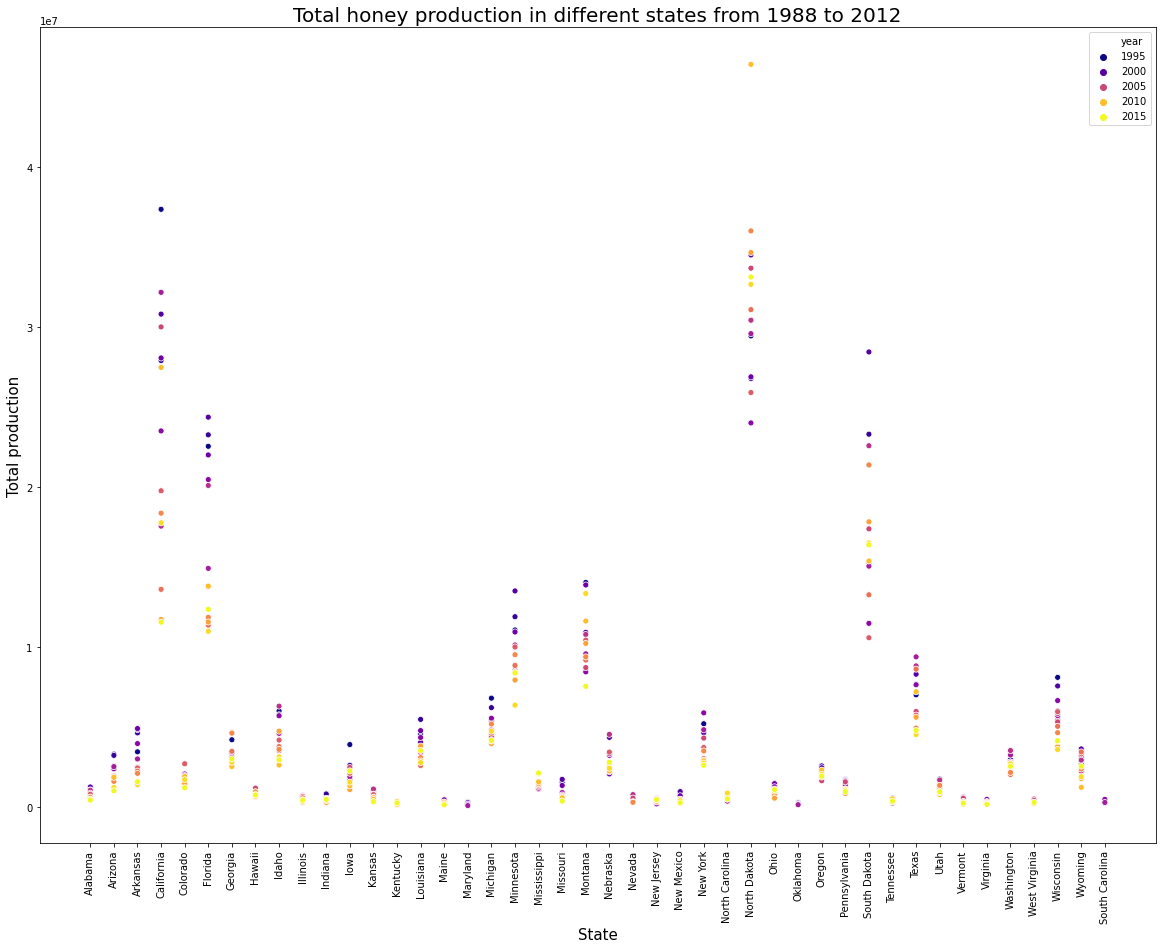

In [6]:
fig, ax1=plt.subplots(1, 1, figsize=(20,15))
ax=sns.scatterplot(data=honey_pro, x='state',y='total_production', palette='plasma',hue=honey_pro.year,ax=ax1)
ax1.set_title('Total honey production in different states from 1988 to 2012',fontsize=20)
ax1.set_xlabel('State',fontsize=15)
plt.xticks(rotation=90)
ax1.set_ylabel('Total production', fontsize=15)

## Data analysis by year
### Visualize the total production

In [7]:
data1=honey_pro.groupby('year')
data2=data1['total_production'].agg([np.sum, np.mean, np.std]).reset_index()
error=data1['total_production'].agg([np.std]).reset_index()
data2
error

,year,std
0,1998,8.149349e+06
1,1999,7.217900e+06
2,2000,8.510779e+06
3,2001,6.824564e+06
4,2002,5.812862e+06
5,2003,6.956405e+06
6,2004,6.778949e+06
7,2005,7.297382e+06
8,2006,5.479969e+06
9,2007,5.698385e+06


In [8]:
colony_data=data1['n_colony'].agg([np.sum, np.mean, np.std]).reset_index()
error=data1['n_colony'].agg([np.std]).reset_index()
colony_data.head()

,year,sum,mean,std
0,1998,2621000.0,60953.488372,85355.545887
1,1999,2637000.0,61325.581395,88411.570276
2,2000,2604000.0,60558.139535,89099.543670
3,2001,2542000.0,57772.727273,88713.771154
4,2002,2565000.0,58295.454545,91698.844695


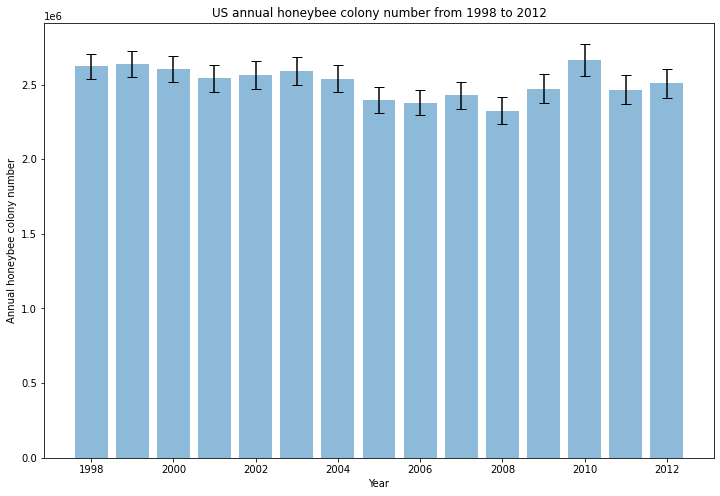

In [9]:
fig, ax1=plt.subplots(1,1,figsize=(12,8))
plt.bar(x='year', height='sum',data=colony_data,yerr=error['std'], align='center',alpha=0.5,ecolor='black',capsize=5)
plt.title('US annual honeybee colony number from 1998 to 2012')
plt.xlabel('Year')
plt.ylabel('Annual honeybee colony number')
plt.show()

In [10]:
#Visualize average yield per colony
honey_pro['aver_yield']=honey_pro['total_production']/honey_pro['n_colony']
aver_yield=honey_pro.groupby('year')['aver_yield'].agg([np.sum, np.mean, np.std]).reset_index()
aver_yield.head()

,year,sum,mean,std
0,1998,3008.0,69.953488,22.929450
1,1999,2815.0,65.465116,19.951547
2,2000,2906.0,67.581395,23.253502
3,2001,2840.0,64.545455,19.623733
4,2002,2939.0,66.795455,21.452576


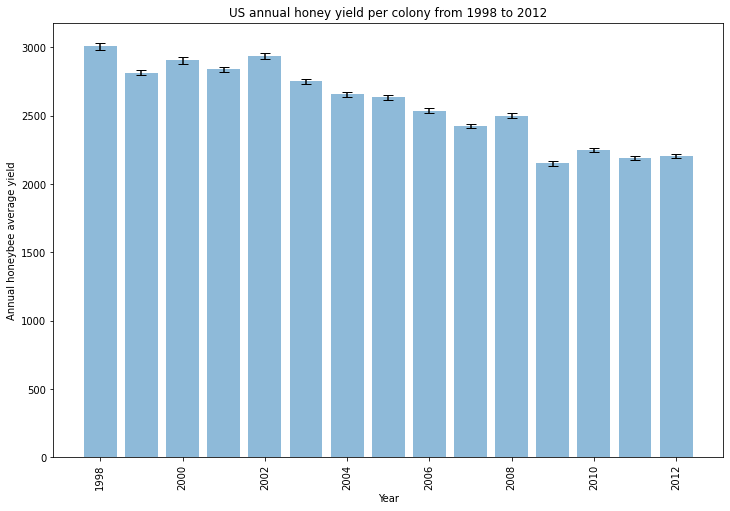

In [11]:
fig, ax1=plt.subplots(1,1,figsize=(12,8))
plt.bar(x='year', height='sum',data=aver_yield,yerr=aver_yield['std'], align='center',alpha=0.5,ecolor='black',capsize=5)
plt.title('US annual honey yield per colony from 1998 to 2012')
plt.xlabel('Year')
plt.ylabel('Annual honeybee average yield')
plt.xticks(rotation=90)
plt.show()

### Conclusion:
#### The annual honey yield per colony exhibits decreasing trend.

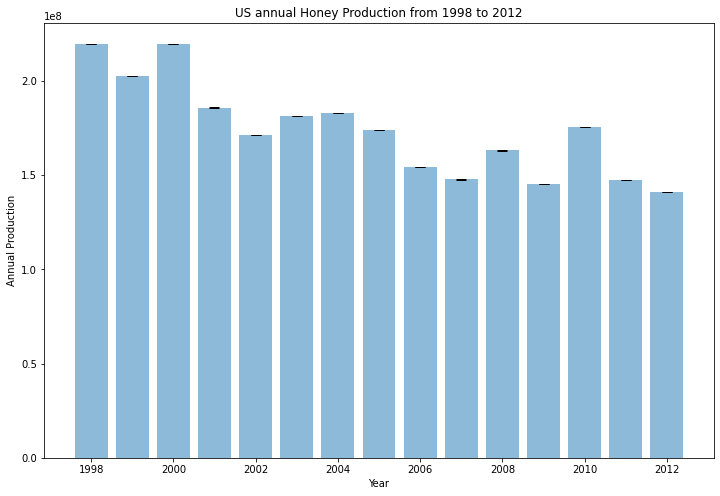

In [12]:
fig, ax1=plt.subplots(1,1,figsize=(12,8))
plt.bar(x='year', height='sum',data=data2,yerr=error['std'], align='center',alpha=0.5,ecolor='black',capsize=5)
plt.title('US annual Honey Production from 1998 to 2012')
plt.xlabel('Year')
plt.ylabel('Annual Production')
plt.show()

#### Conclusion 1: During 1998 and 2012, the USA produces the maximum honey in 2000. After 2000, the production exhibit the decreasing trend. 

In [13]:
data_by_year=honey_pro.groupby('year').mean()
data_by_year['pro_per_colony']=50000*data_by_year['production_per_colony']
data_by_year.head()

,n_colony,production_per_colony,total_production,stock_held,price_per_lb,total_production_value,consumption,aver_yield,pro_per_colony
year,,,,,,,,,
1998,60953.488372,69.953488,5.105093e+06,1.873605e+06,0.832558,3.397465e+06,3.231488e+06,69.953488,3.497674e+06
1999,61325.581395,65.465116,4.706674e+06,1.823023e+06,0.804186,2.875744e+06,2.883651e+06,65.465116,3.273256e+06
2000,60558.139535,67.581395,5.106000e+06,1.975721e+06,0.791395,3.059721e+06,3.130279e+06,67.581395,3.379070e+06
2001,57772.727273,64.545455,4.221545e+06,1.471909e+06,0.911818,3.006409e+06,2.749636e+06,64.545455,3.227273e+06
2002,58295.454545,66.795455,3.892386e+06,8.903864e+05,1.371364,5.165955e+06,3.002000e+06,66.795455,3.339773e+06


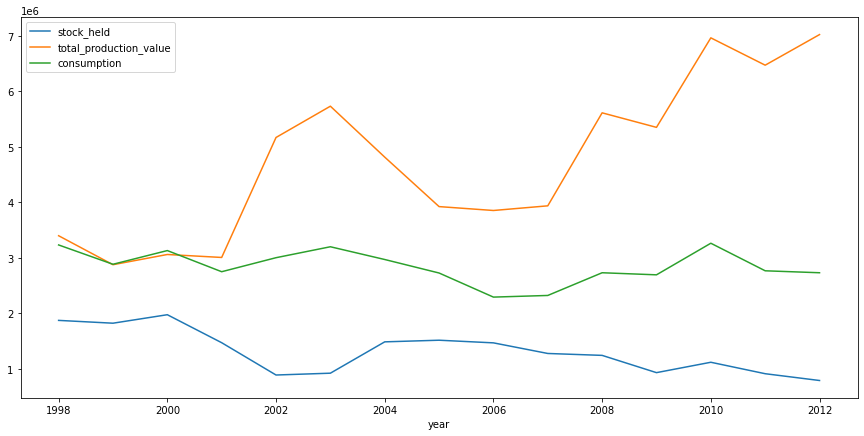

In [14]:
data_by_year[['stock_held','total_production_value','consumption']].\
              plot(ax=plt.subplots(figsize=(15,7))[1])
plt.show()

#### Conclusion 2: During 1998 and 2012, the honey stock was increasing; the honey total production value was keeping relative stable; contrarily, the honey consumption was decreasing.


### Top 10 of honey-producing states 

In [15]:
data3=honey_pro.groupby('state')['total_production'].sum().sort_values(ascending=False).reset_index()
data3.head(10)

,state,total_production
0,North Dakota,475085000.0
1,California,347535000.0
2,South Dakota,266141000.0
3,Florida,247048000.0
4,Montana,156562000.0
5,Minnesota,144360000.0
6,Texas,104904000.0
7,Wisconsin,81833000.0
8,Michigan,72820000.0
9,Idaho,66160000.0


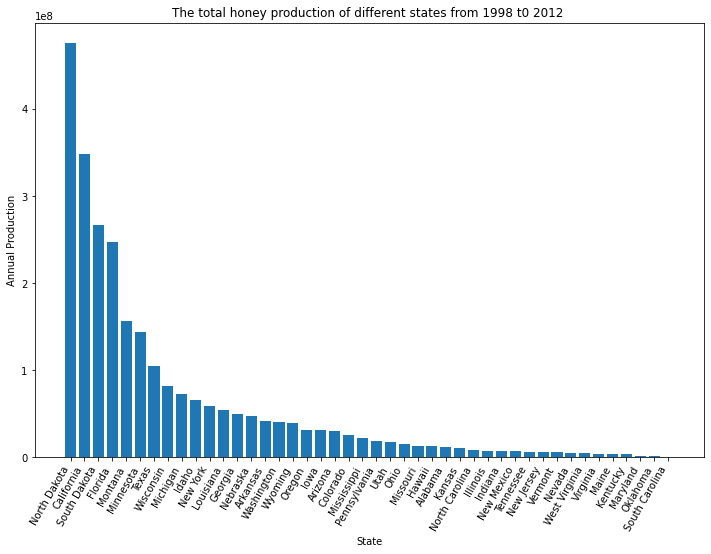

In [16]:
fig, ax1=plt.subplots(1,1,figsize=(12,8))
plt.bar(x='state', height='total_production',data=data3)
plt.title('The total honey production of different states from 1998 t0 2012 ')
plt.xlabel('State')
plt.xticks(ha='right', rotation=60, fontsize=10)
plt.ylabel('Annual Production')
plt.show()

#### This figure indicates that North Dekota has the topest level of honey production and South Carolina has the lowest level of honey production.

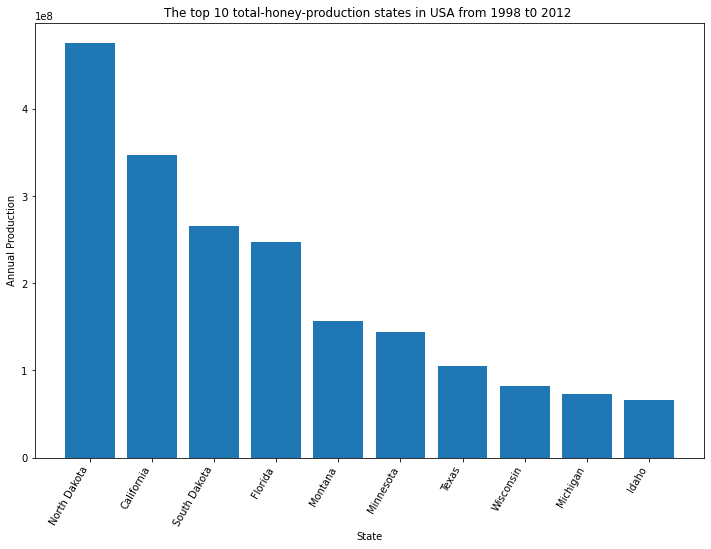

In [17]:
#Top 10 honey-producing states
data3=data3.head(10)
fig, ax1=plt.subplots(1,1,figsize=(12,8))
plt.bar(x='state', height='total_production',data=data3)
plt.title('The top 10 total-honey-production states in USA from 1998 t0 2012 ')
plt.xlabel('State')
plt.xticks(ha='right', rotation=60, fontsize=10)
plt.ylabel('Annual Production')
plt.show()

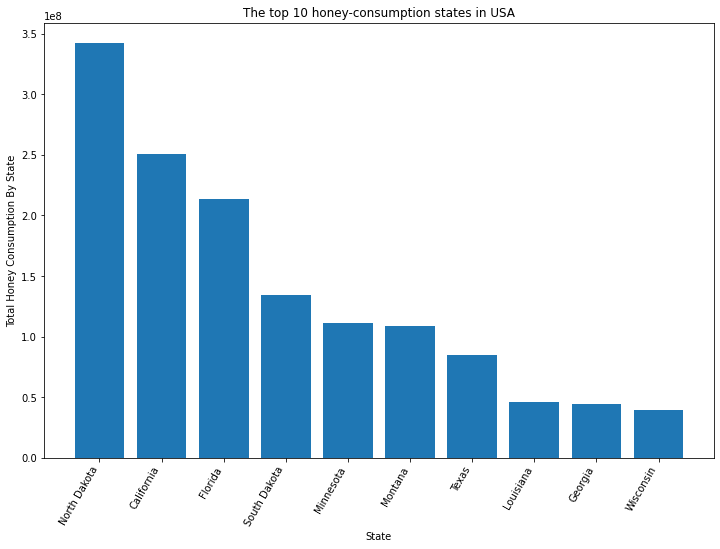

In [18]:
#Top 10 honey-consumping states
data4 = honey_pro[['state','consumption']].groupby('state').sum().sort_values(by='consumption', ascending=False).head(10).reset_index()
fig, ax1=plt.subplots(1,1,figsize=(12,8))
plt.bar(x='state', height='consumption',data=data4)
plt.title('The top 10 honey-consumption states in USA')
plt.xlabel('State')
plt.xticks(ha='right', rotation=60, fontsize=10)
plt.ylabel('Total Honey Consumption By State')
plt.show()

In [19]:
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

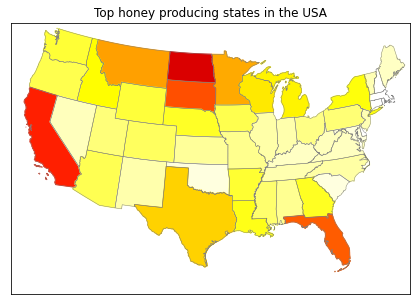

In [20]:
f, ax1 = plt.subplots(1,1, figsize = (30,5))

states_production = honey_pro[['state','total_production']].groupby('state').sum().sort_values(by='total_production', ascending=False).reset_index()
states_production_dict = dict(zip(states_production.state, states_production.total_production))

m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95, ax=ax1)

shp_info = m.readshapefile('usa-map-shape/st99_d00','states',drawbounds=True, linewidth=0.45,color='gray')

colors={}
statenames=[]
cmap = plt.cm.hot_r 
vmin = 0; vmax = 1000000000
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico','Alaska',
                         'New Hampshire','Massachusetts','Connecticut',
                        'Rhode Island','Delaware']:
        pop = states_production_dict[statename]
        colors[statename] = cmap(np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)

for nshape,seg in enumerate(m.states):
    if statenames[nshape] not in ['District of Columbia','Puerto Rico','Alaska',
                         'New Hampshire','Massachusetts','Connecticut',
                        'Rhode Island','Delaware']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax1.add_patch(poly)

plt.title('Top honey producing states in the USA')        
plt.show()    

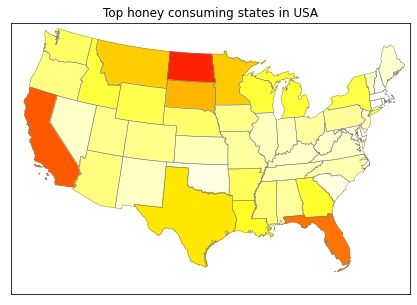

In [21]:
f, ax2=plt.subplots(1,1, figsize = (30,5))
states_consumption = honey_pro[['state','consumption']].groupby('state').sum().sort_values(by='consumption', ascending=False).reset_index()
states_consumption_dict = dict(zip(states_consumption.state, states_consumption.consumption))

m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95, ax=ax2)

shp_info = m.readshapefile('usa-map-shape/st99_d00','states',drawbounds=True, linewidth=0.45,color='gray')

colors={}
statenames=[]
cmap = plt.cm.hot_r 
vmin = 0; vmax = 1000000000
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico','Alaska',
                         'New Hampshire','Massachusetts','Connecticut',
                        'Rhode Island','Delaware']:
        pop = states_consumption_dict[statename]
        colors[statename] = cmap(np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
for nshape,seg in enumerate(m.states):
    if statenames[nshape] not in ['District of Columbia','Puerto Rico','Alaska',
                         'New Hampshire','Massachusetts','Connecticut',
                        'Rhode Island','Delaware']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax2.add_patch(poly)
plt.title('Top honey consuming states in USA')        
plt.show()    

#### Based on honey production-consuming analysis, 'North Dekota' and 'Californian' rank as the top 2 in both honey-producing and honey-consuming states. 'Florida' ranks in third in consuming and in fourth in producing honey; on the contrary, 'South Dekota' ranks in third in producing and in fourth  in consuming honey.

#### PairPlots: relationship among different variables for the top 20 producers of honey

### Evolution of the price of honey

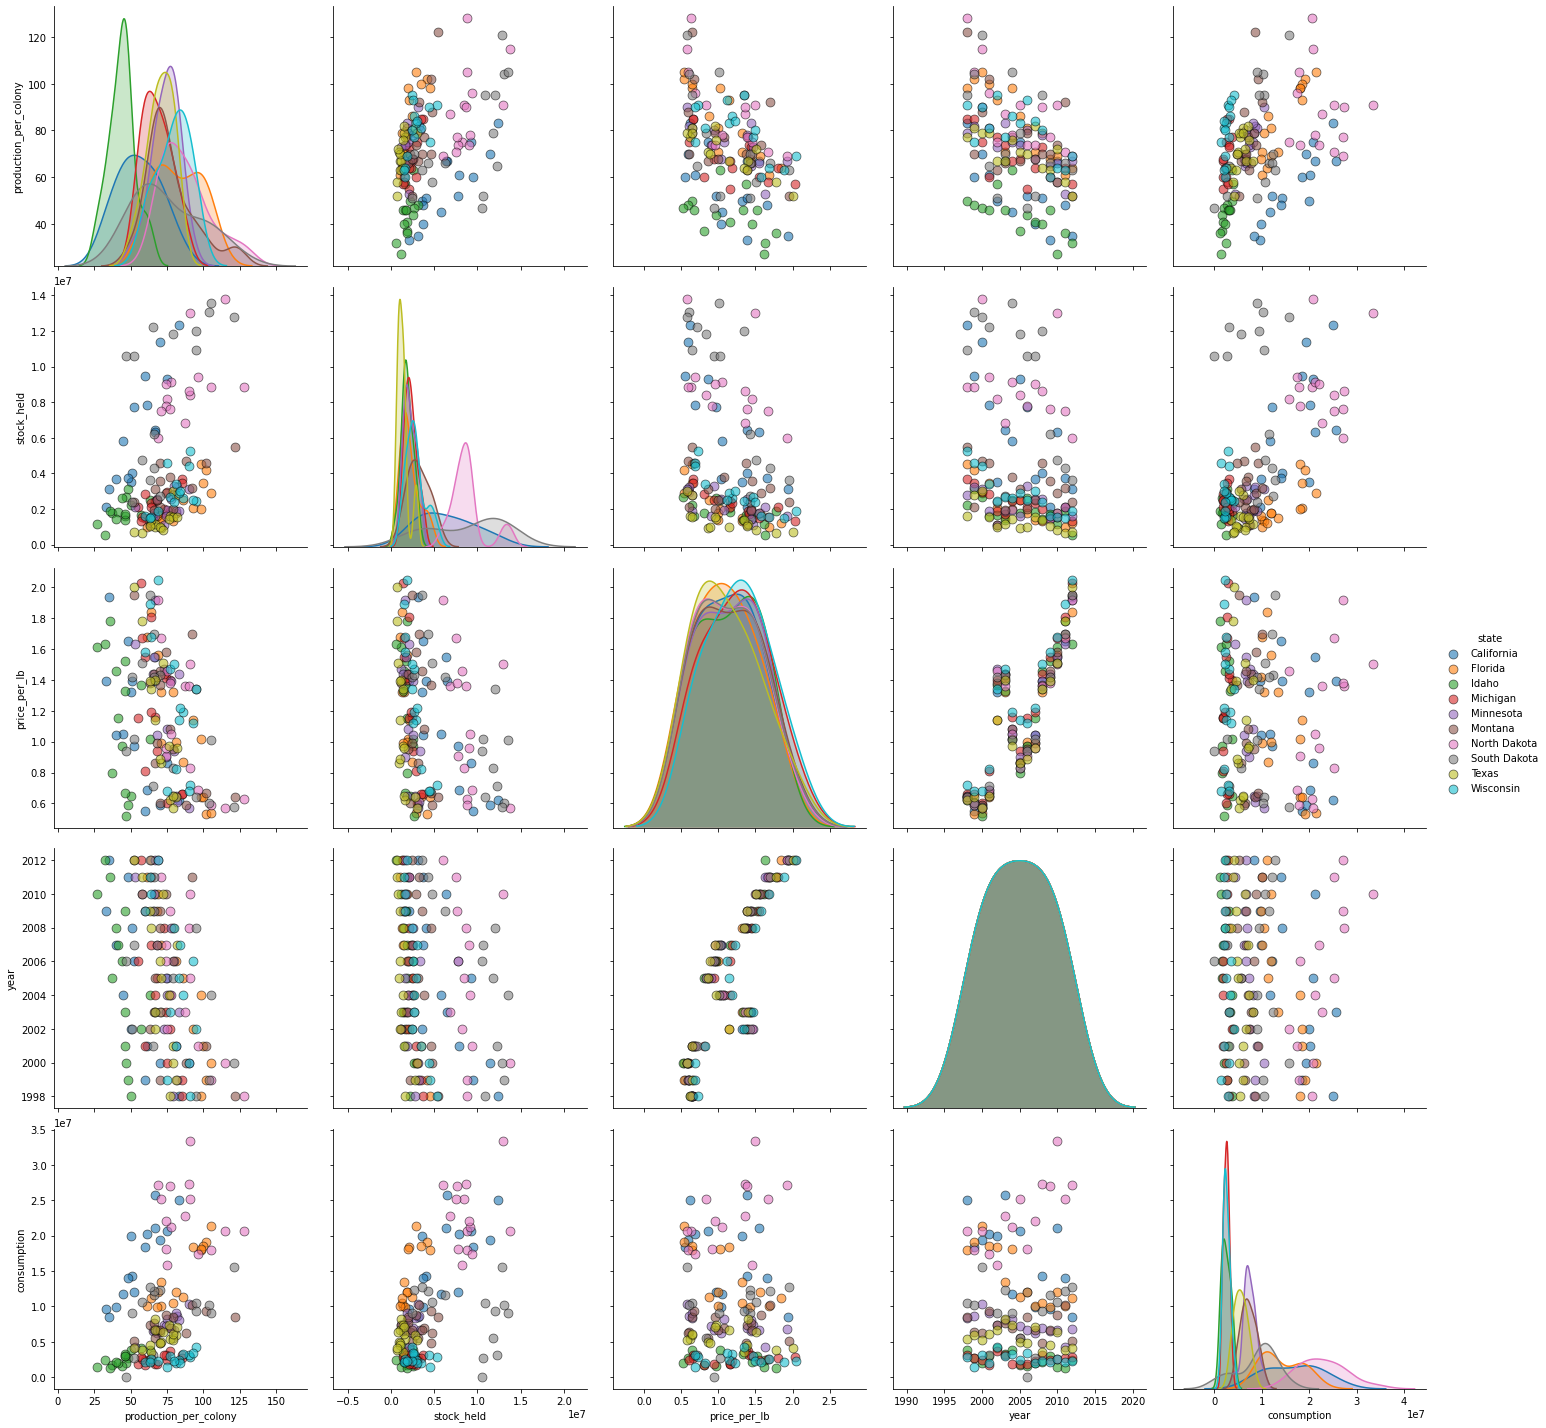

In [22]:
sns.pairplot(honey_pro.loc[honey_pro['state'].isin(list(data3.state))], hue='state',
            diag_kind='kde', plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'},
            height=4, vars=['production_per_colony', 'stock_held','price_per_lb','year','consumption'])

In [23]:
import plotly as py
import plotly.graph_objects as go

In [24]:
evo_price=honey_pro.groupby('year', as_index=False).agg({'price_per_lb':'mean'}).reset_index()
evo_price

,index,year,price_per_lb
0,0,1998,0.832558
1,1,1999,0.804186
2,2,2000,0.791395
3,3,2001,0.911818
4,4,2002,1.371364
5,5,2003,1.494773
6,6,2004,1.284634
7,7,2005,1.195122
8,8,2006,1.303659
9,9,2007,1.438293


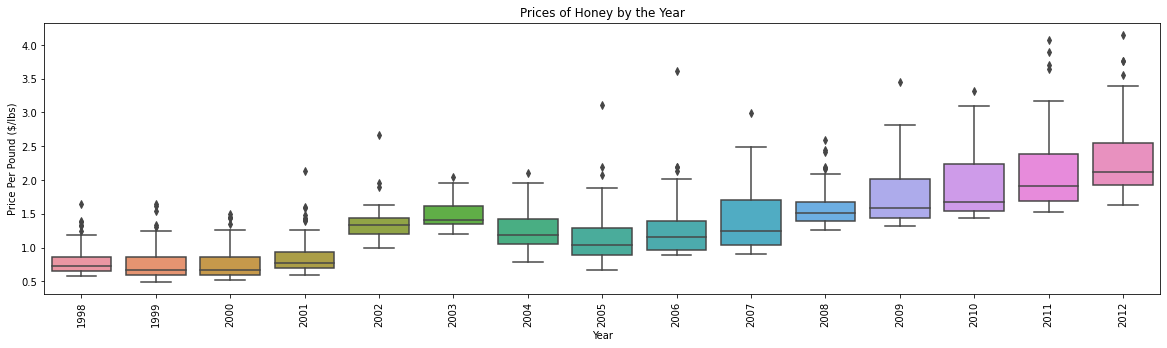

In [25]:
#Boxplot of honey price during 1998 and 2012
df_prices_by_year =honey_pro[['year','price_per_lb']]
plt.figure(figsize=(20,5))
sns.boxplot(data=df_prices_by_year, x='year',y='price_per_lb')
plt.title("Prices of Honey by the Year")
plt.ylabel("Price Per Pound ($/lbs)")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.show()

#### The price of honey(per lb) has been increasing from 0.8 dollar  to 2.367 dollar, which is almost three-fold changing in 14 years.

### The correlation between the production and the price

In [26]:
pro1=honey_pro[['n_colony','total_production','stock_held','price_per_lb','total_production_value','consumption']]
pro1.head()

,n_colony,total_production,stock_held,price_per_lb,total_production_value,consumption
0,16000.0,1136000.0,159000.0,0.72,818000.0,977000.0
1,55000.0,3300000.0,1485000.0,0.64,2112000.0,1815000.0
2,53000.0,3445000.0,1688000.0,0.59,2033000.0,1757000.0
3,450000.0,37350000.0,12326000.0,0.62,23157000.0,25024000.0
4,27000.0,1944000.0,1594000.0,0.70,1361000.0,350000.0


Index(['n_colony', 'total_production', 'stock_held', 'price_per_lb',
       'total_production_value', 'consumption'],
      dtype='object')

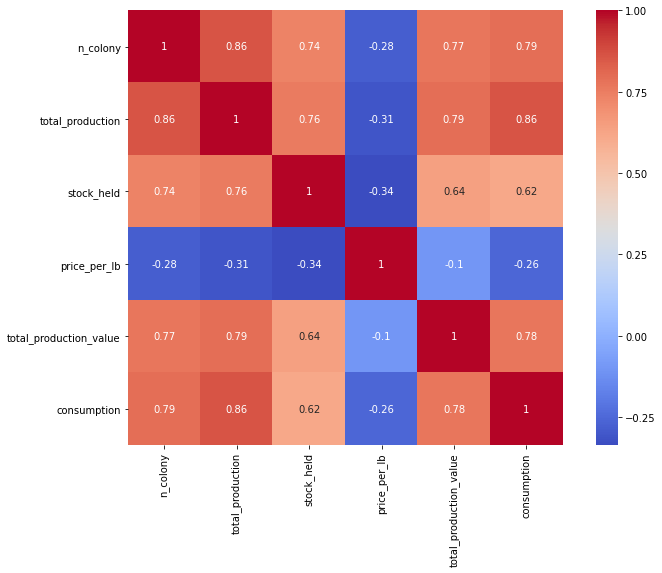

In [27]:
corr=pro1.corr(method='kendall')
plt.figure(figsize=(12,8))
ax=sns.heatmap(corr, annot=True, cmap='coolwarm',square=True,fmt='.2g',xticklabels='auto', yticklabels='auto')
ax.set_ylim([6,0])
pro1.columns

#### 1. Honey price per pound has negative correlation with 'number of colony', 'total production' and 'stocks' at the correction value of '-0.28', '-0.31', '-0.34', which indicates that when the honey colony become less or total production goes down or stocks decreases, the honey price per pound increases.
#### 2. Colony number  has strong correlation with 'total production'(0.86), 'stock held'(0.74), 'total production value'(0.77) and 'consumption'(0.79); with the colony number increasing, the honey production, stock and total production value all goes up.
#### 3. Consumption has strong correlation with 'total production'(0.86), too; it indicates that the more 'total_production', the more consumption; if we want to increase the consumption, we have to improve production.
#### 4. The stock hed has negative correlation(-0.34) with honey price per lb, which indicates the higher honey price, the less honey stock.
#### The colony number plays a key in role in influencing the production. The effect of neonics needs to be understood more deeply. Let' s check how to use neonics properly to increase the colony number.

### Machine Learning analysis

#### 1. linear regression and logistic regression
#### 2. PCA analysis

In [28]:
from numpy.random import seed
np.random.seed(47)
N_rep=10000
np.random.seed(47)
N_rep=10000
mean_replicate=np.empty(N_rep)
for i in range(N_rep):
    samples=np.random.choice(pro1['total_production'], len(honey_pro['total_production']))
    mean_replicate[i]=np.mean(samples)
mean, std=np.mean(mean_replicate), np.std(mean_replicate)
lower_bound=mean-1.64*std
print(lower_bound)

3716330.432167052


#### If we performed 10000 replicates immediately after setting the random seed to 47, the lower limit value fortotal prodcuction is 3716330.4 kg.

In [29]:
#Import the necessary module
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, f1_score, accuracy_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import re
from sklearn.tree import DecisionTreeRegressor

In [30]:
#Let' s start machine learning method by building the training and test datasets.
X=pro1.iloc[:,[0,2,3,4,5]]
y=pro1['total_production']
#getting test and training set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=353)
print(X_train.head())
print(y_train.head())

     n_colony  stock_held  price_per_lb  total_production_value  consumption
144   11000.0    106000.0          0.79                174000.0     114000.0
438    4000.0     27000.0          2.44                381000.0     129000.0
470   28000.0    326000.0          1.43               2122000.0    1158000.0
517   27000.0    463000.0          1.92               2540000.0     860000.0
325   12000.0    104000.0          1.20                461000.0     280000.0
144     220000.0
438     156000.0
470    1484000.0
517    1323000.0
325     384000.0
Name: total_production, dtype: float64


In [31]:
reg=LinearRegression()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

1.0

In [32]:
#Let' s start machine learning method by building the training and test datasets.
X1=pro1.iloc[:,[0]]
y=pro1['total_production']
#getting test and training set
X1_train,X1_test,y_train,y_test=train_test_split(X1,y,test_size=0.2, random_state=353)
print(X1_train.head())
print(y_train.head())

     n_colony
144   11000.0
438    4000.0
470   28000.0
517   27000.0
325   12000.0
144     220000.0
438     156000.0
470    1484000.0
517    1323000.0
325     384000.0
Name: total_production, dtype: float64


### Construct Linear Regression Model

In [33]:
reg=LinearRegression()
reg.fit(X1_train, y_train)
y_pred=reg.predict(X1_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.909215043012157

#### R^2 score between colony number and total production is 0.9092 based on linear regression model.

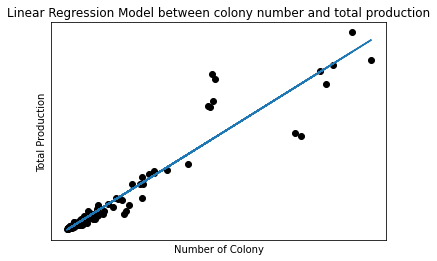

Linear regression model equation is Y=75.176269*x+(-217527.838246)


In [34]:
plt.scatter(X_test['n_colony'], y_test,  color='black')
m, b = np.polyfit(X_test['n_colony'],y_test, 1)
#m = slope, b=intercept
plt.plot(X_test['n_colony'], m*X_test['n_colony'] + b)
#add line of best fit
plt.xlabel('Number of Colony')
plt.ylabel('Total Production')
plt.title('Linear Regression Model between colony number and total production')
plt.xticks(())
plt.yticks(())
plt.show()
print('Linear regression model equation is Y=%f*x+(%f)'%(m,b))

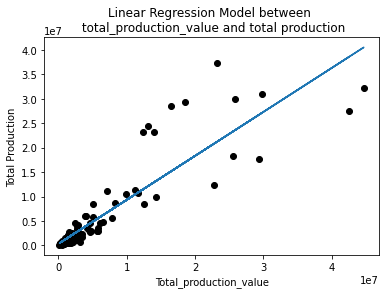

Linear regression model equation is Y=0.899496*x+321513.360978


In [35]:
plt.scatter(X_test['total_production_value'], y_test,  color='black')
m, b = np.polyfit(X_test['total_production_value'],y_test, 1)
#m = slope, b=intercept
plt.plot(X_test['total_production_value'], m*X_test['total_production_value'] + b)
#add line of best fit
plt.xlabel('Total_production_value')
plt.ylabel('Total Production')
plt.title('Linear Regression Model between \n total_production_value and total production')
plt.show()
print('Linear regression model equation is Y=%f*x+%f'%(m,b))

In [36]:
X2=pro1.iloc[:,[4]]
y=pro1['total_production']
#getting test and training set
X2_train,X2_test,y_train,y_test=train_test_split(X2,y,test_size=0.2, random_state=353)
reg=LinearRegression()
reg.fit(X2_train, y_train)
y_pred=reg.predict(X2_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7764296694870672

#### R^2 score between production value and total production is 0.7764 based on linear regression model.

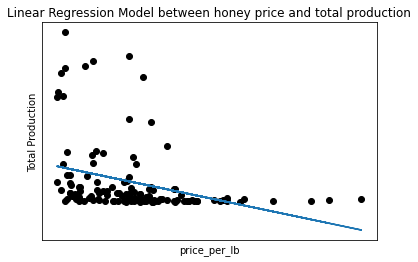

Linear regression model equation is Y=-3864985.077840*x+(10028476.493532)


In [37]:
plt.scatter(X_test['price_per_lb'], y_test,  color='black')
m, b = np.polyfit(X_test['price_per_lb'],y_test, 1)
#m = slope, b=intercept
plt.plot(X_test['price_per_lb'], m*X_test['price_per_lb'] + b)
#add line of best fit
plt.xlabel('price_per_lb')
plt.ylabel('Total Production')
plt.title('Linear Regression Model between honey price and total production')
plt.xticks(())
plt.yticks(())
plt.show()
print('Linear regression model equation is Y=%f*x+(%f)'%(m,b))

In [38]:
X3=pro1.iloc[:,[3]]
y=pro1['total_production']
#getting test and training set
X3_train,X3_test,y_train,y_test=train_test_split(X3,y,test_size=0.2, random_state=353)
reg=LinearRegression()
reg.fit(X3_train, y_train)
y_pred=reg.predict(X3_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.0916464296767836

#### R^2 score between price and total production is 0.09164 based on linear regression model, which indicates very low correlation between them.

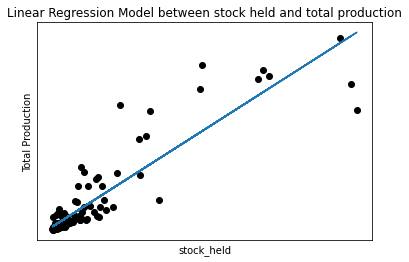

Linear regression model equation is Y=2.893702*x+(695483.505816)


In [39]:
plt.scatter(X_test['stock_held'], y_test,  color='black')
m, b = np.polyfit(X_test['stock_held'],y_test, 1)
#m = slope, b=intercept
plt.plot(X_test['stock_held'], m*X_test['stock_held'] + b)
#add line of best fit
plt.xlabel('stock_held')
plt.ylabel('Total Production')
plt.title('Linear Regression Model between stock held and total production')
plt.xticks(())
plt.yticks(())
plt.show()
print('Linear regression model equation is Y=%f*x+(%f)'%(m,b))

In [40]:
X4=pro1.iloc[:,[2]]
y=pro1['total_production']
#getting test and training set
X4_train,X4_test,y_train,y_test=train_test_split(X4,y,test_size=0.2, random_state=353)
reg=LinearRegression()
reg.fit(X4_train, y_train)
y_pred=reg.predict(X4_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8069849769051094

#### R^2 score between stock held and total production is 0.8069 based on linear regression model.

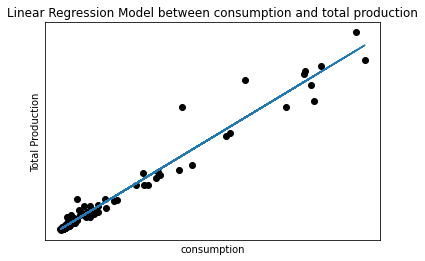

Linear regression model equation is Y=1.348415*x+(211645.595899)


In [41]:
plt.scatter(X_test['consumption'], y_test,  color='black')
m, b = np.polyfit(X_test['consumption'],y_test, 1)
#m = slope, b=intercept
plt.plot(X_test['consumption'], m*X_test['consumption'] + b)
#add line of best fit
plt.xlabel('consumption')
plt.ylabel('Total Production')
plt.title('Linear Regression Model between consumption and total production')
plt.xticks(())
plt.yticks(())
plt.show()
print('Linear regression model equation is Y=%f*x+(%f)'%(m,b))

In [42]:
X5=pro1.iloc[:,[5]]
y=pro1['total_production']
#getting test and training set
X5_train,X5_test,y_train,y_test=train_test_split(X5,y,test_size=0.2, random_state=353)
reg=LinearRegression()
reg.fit(X5_train, y_train)
y_pred=reg.predict(X5_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9663798506098795

#### R^2 score between consumption and total production is 0.9663 based on linear regression model.

In [43]:
#Build XGBoost model
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)
y_pred= gbm.predict(X_test)
r2_score(y_test, y_pred)

0.7070393912557189

#### The R^2 score between y_test and y_predict is 0.4896 based on XGBoost model.

In [44]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.1, random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=0.0001)
DTree.fit(X_train, y_train)
y_predict=DTree.predict(X_test)
from sklearn.metrics import r2_score 
r2_score(y_test, y_predict)

0.9360104293707117

#### The R^2 score between y_test and y_predict is 0.9316 based on decision tree model.

#### Build the gradient boosting regressor

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [46]:
def regressor(X, y, params, random_state=1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))
    
    # Fit regression model
    clf = GradientBoostingRegressor(**params)
    clf.fit(X_train, y_train)
    mse = mean_squared_error(y_test, clf.predict(X_test))
    print("MSE: %.4f" % mse)
    
    # Plot training deviance
    test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_predict(X_test)):
        test_score[i] = clf.loss_(y_test, y_pred)

    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.title('Deviance')
    plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
             label='Training Set Deviance')
    plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
             label='Test Set Deviance')
    plt.legend(loc='upper right')
    plt.xlabel('Boosting Iterations')
    plt.ylabel('Deviance')
    
    # Plot feature importance
    feature_importance = clf.feature_importances_
    
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    im = pd.DataFrame({'feature': pro1.columns[1:], 'relative importance': feature_importance}).sort_values('relative importance')[-20:]
    plt.subplot(1, 2, 2)
    plt.barh(im['feature'], im['relative importance'])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
    
    plt.subplots_adjust(wspace=30)
    return clf, im

In [47]:
#the first trial
params = {
    'n_estimators': 200,
    'max_depth': 6,
    'min_samples_split': 2,
    'learning_rate': 0.01,
    'loss': 'ls',
}

Training set has 394 samples.
Testing set has 169 samples.
MSE: 1553822036456.4189


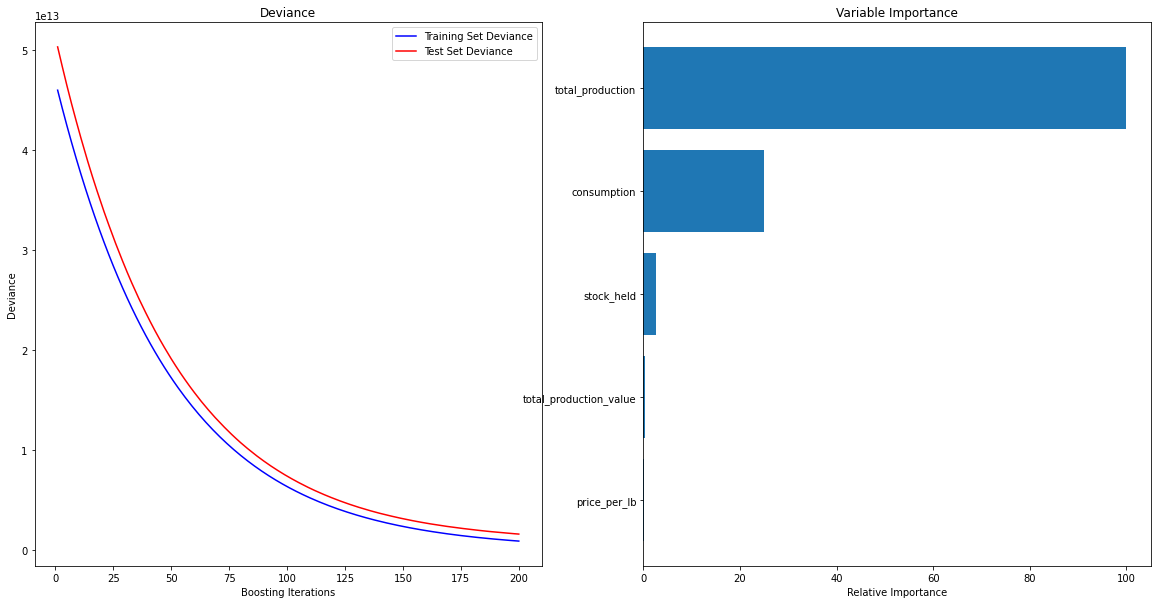

<Figure size 432x288 with 0 Axes>

In [48]:
model, im = regressor(X_train, 
                                y_train, 
                                params, random_state=1)

### Conclusion:
#### The gradient boosting model has a MSE of 2145724451870. Total_production is the most important variable.

In [49]:
rg = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01, 0.05, 0.08, 0.1],
                    'max_depth': [4, 6, 8, 10],
                    'max_features': [None, 5, 4, 3, 2, 1]}
scorer = "neg_mean_squared_error"

In [50]:
grid_obj = GridSearchCV(rg, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train, y_train)
best_model = grid_fit.best_estimator_
best_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=3, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [51]:
def y_to_earnings(y):
    '''
    The function to convert the log earnings
    '''
    return np.exp(y)-1

In [52]:
predicted_log_earnings = best_model.predict(X_test)
print("MSE of the tuned model: {:.3}".format(np.mean(np.square(predicted_log_earnings - y_test))))
difference = abs(y_to_earnings(predicted_log_earnings) - y_to_earnings(y_test))

MSE of the tuned model: 4.91e+11


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning:

overflow encountered in exp



### Construct Decision Tree Model

### Conclusion:
#### The linear regression model (R^2=1) is more suitable for this honey production data than decision Tree model(R^2=0.93).

### Visualize the clusters using PCA analysis: 
Principal Component Analysis (PCA) can help us reduce the dimensionality of our data.This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

In [53]:
import scipy
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#setup Seaborn
sns.set_style('whitegrid')
sns.set_context('poster')

In [54]:
kmeans4=KMeans(n_clusters=4, random_state=1)

In [55]:
matrix=honey_pro.pivot_table(index='state', \
                        columns=['year'], \
                        values=['total_production'])
matrix=matrix.fillna(0)
matrix.head()

total_production                                                  \
year                   1998        1999        2000        2001        2002   
state                                                                         
Alabama           1136000.0   1156000.0   1248000.0   1022000.0   1032000.0   
Arizona           3300000.0   3224000.0   2360000.0   2537000.0   2394000.0   
Arkansas          3445000.0   4628000.0   4836000.0   4900000.0   3960000.0   
California       37350000.0  27900000.0  30800000.0  28060000.0  23500000.0   
Colorado          1944000.0   2052000.0   1740000.0   1430000.0   1440000.0   

                                                                        \
year              2003        2004        2005        2006        2007   
state                                                                    
Alabama      1066000.0   1044000.0    858000.0    792000.0    616000.0   
Arizona      2520000.0   1760000.0   1800000.0   1950000.0   1920000.0   
Arkansas     3000000.0   2280000.0   2484000.0   2432000.0   2240000.0   
California  32160000.0  17550000.0  30000000.0  19760000.0  13600000.0   
Colorado     2064000.0   1840000.0   1960000.0   2700000.0   1581000.0   

                                                                        
year              2008        2009        2010        2011        2012  
state                                                                   
Alabama       594000.0    450000.0    486000.0    450000.0    432000.0  
Arizona      1600000.0   1040000.0   1848000.0   1219000.0   1012000.0  
Arkansas     2100000.0   1368000.0   1500000.0   1408000.0   1575000.0  
California  18360000.0  11715000.0  27470000.0  17760000.0  11550000.0  
Colorado     1215000.0   1484000.0   1904000.0   1705000.0   1200000.0

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



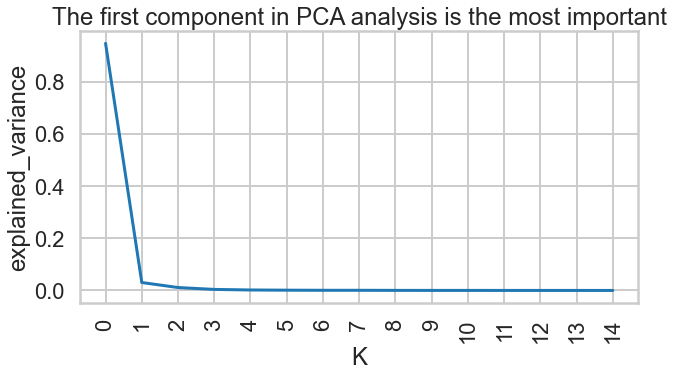

In [56]:
x_cols=matrix.as_matrix()
#scale data
scaler = StandardScaler()
features = scaler.fit_transform(matrix)
#fit PCA
pca = PCA()
components = pca.fit_transform(features)
a=pca.fit(matrix).explained_variance_ratio_
fig, ax=plt.subplots(figsize=(10,5))
pd.Series(a).plot()
plt.xlabel('K')
plt.ylabel('explained_variance')
plt.xticks(rotation=90)
ax.set_xticks(np.arange(0,15,1))
plt.title('The first component in PCA analysis is the most important')
plt.show()

In [57]:
matrix=honey_pro.pivot_table(index='year', \
                        columns=['state'], \
                        values=['total_production'])
matrix=matrix.fillna(0)
matrix.head()

total_production                                               \
state          Alabama    Arizona   Arkansas  California   Colorado   
year                                                                  
1998         1136000.0  3300000.0  3445000.0  37350000.0  1944000.0   
1999         1156000.0  3224000.0  4628000.0  27900000.0  2052000.0   
2000         1248000.0  2360000.0  4836000.0  30800000.0  1740000.0   
2001         1022000.0  2537000.0  4900000.0  28060000.0  1430000.0   
2002         1032000.0  2394000.0  3960000.0  23500000.0  1440000.0   

                                                               ...      \
state     Florida    Georgia    Hawaii      Idaho  Illinois    ...       
year                                                           ...       
1998   22540000.0  4200000.0  944000.0  6000000.0  639000.0    ...       
1999   23256000.0  3315000.0  640000.0  5760000.0  594000.0    ...       
2000   24360000.0  3135000.0  784000.0  4700000.0  488000.0    ...       
2001   22000000.0  3135000.0  696000.0  4600000.0  456000.0    ...       
2002   20460000.0  2600000.0  952000.0  5700000.0  720000.0    ...       

                                                                        \
state South Dakota Tennessee      Texas       Utah   Vermont  Virginia   
year                                                                     
1998    21375000.0  448000.0  7007000.0  1740000.0  384000.0  296000.0   
1999    23296000.0  408000.0  8748000.0  1170000.0  396000.0  245000.0   
2000    28435000.0  549000.0  8295000.0   984000.0  413000.0  294000.0   
2001    15275000.0  472000.0  7663000.0   874000.0  567000.0  468000.0   
2002    11475000.0  488000.0  7638000.0  1298000.0  623000.0  304000.0   

                                                      
state Washington West Virginia  Wisconsin    Wyoming  
year                                                  
1998   2958000.0      330000.0  8099000.0  2760000.0  
1999   2600000.0      234000.0  6000000.0  2664000.0  
2000   2808000.0      378000.0  7560000.0  3627000.0  
2001   2496000.0      455000.0  5427000.0  2926000.0  
2002   2550000.0      459000.0  6650000.0  2394000.0  

[5 rows x 44 columns]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



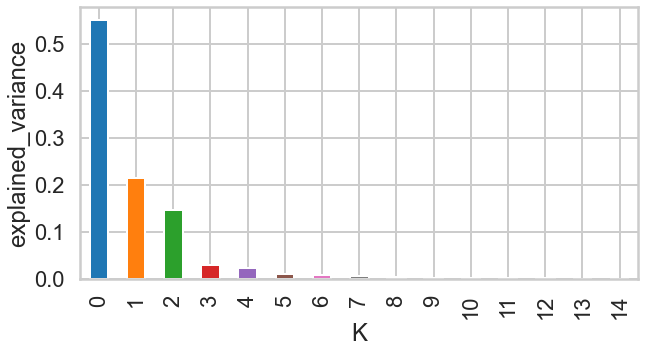

In [58]:
x_cols=matrix.as_matrix()
#scale data
scaler = StandardScaler()
features = scaler.fit_transform(matrix)
#fit PCA
pca = PCA()
components = pca.fit_transform(features)
a=pca.fit(matrix).explained_variance_ratio_
# Plot the explained variances
fig, ax=plt.subplots(figsize=(10,5))
pd.Series(a).plot(kind='bar')
plt.xlabel('K')
plt.ylabel('explained_variance')
ax.set_xticks(np.arange(0,15,1))

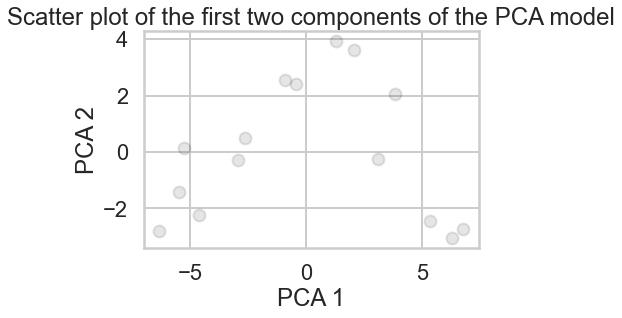

In [59]:
PCA_components=pd.DataFrame(components)
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Scatter plot of the first two components of the PCA model')
plt.show()

#### Based on PCA analysis, the first three components among all states are very important. Between the first two components, there' s no clear clusters between them.

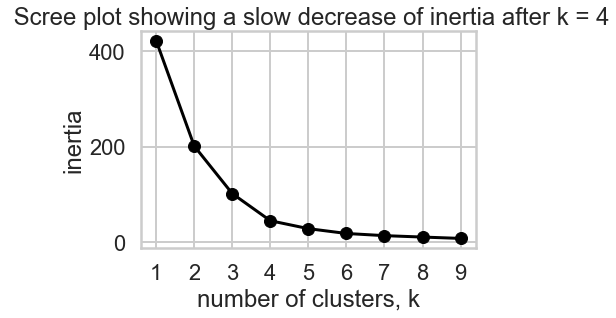

In [60]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.title(' Scree plot showing a slow decrease of inertia after k = 4')
plt.show()

#### Based on the honey production dataset analysis, the colony number has strong correlation with total production and total producation value. Thus, figure out how to maximize the colony number will provide important suggestions to maximize the honey production, which helps guide honeybee management decisions in the United States.
#### Exposure to pesticide, pest and other diseases will cause colony loss. Here, we mainly focus on pesticide part: neonics usage.

### Part II. Identify the relationship between colony number and Neonicotinoid (neonic) pesticides application
#### Import the necessary modules

In [61]:
sns.set()
from matplotlib import style
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
plt.style.use(['seaborn-dark'])
%config IPCompleter.greedy=True
from IPython.display import display
from IPython.display import Image

In [72]:
neonic=pd.read_csv('neonic.csv',index_col=7).rename(columns={
    'state':'state_code',
    'numcol':'n_colony',
    'yieldpercol':'production_per_colony(lb)',
    'totalprod':'total_production(lb)',
    'stocks':'stock_held(lb)',
    'priceperlb':'price_per_lb($)',
    'prodvalue':'total_production_value($)',
    'StateName':'state'
})
neonic.head()

,state_code,n_colony,production_per_colony(lb),total_production(lb),stock_held(lb),price_per_lb($),total_production_value($),state,Region,FIPS,CLOTHIANIDIN (kg),IMIDACLOPRID (kg),THIAMETHOXAM (kg),ACETAMIPRID (kg),THIACLOPRID (kg),AllNeonic (kg)
year,,,,,,,,,,,,,,,,
1991,AL,23000.0,24,552000.0,66000.0,0.63,348000.0,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN
1992,AL,25000.0,41,1025000.0,113000.0,0.59,605000.0,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN
1993,AL,19000.0,45,855000.0,103000.0,0.59,504000.0,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN
1994,AL,18000.0,50,900000.0,99000.0,0.52,468000.0,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN
1995,AL,16000.0,58,928000.0,28000.0,0.69,640000.0,Alabama,South,1,0.0,716.5,0.0,0.0,0.0,716.5


In [73]:
#Delete the useless column
neonic.drop(['FIPS'], axis=1, inplace=True)
neonic=neonic.drop([1991,1992, 1993,1994,2017], axis=0)

In [74]:
#Check for the null values
neonic.isnull().sum()

state_code                    0
n_colony                      0
production_per_colony(lb)     0
total_production(lb)          0
stock_held(lb)                0
price_per_lb($)               0
total_production_value($)     0
state                         0
Region                        0
CLOTHIANIDIN (kg)            29
IMIDACLOPRID (kg)            29
THIAMETHOXAM (kg)            29
ACETAMIPRID (kg)             29
THIACLOPRID (kg)             29
AllNeonic (kg)               29
dtype: int64

In [75]:
neonic=neonic.fillna(value=0)

In [65]:
neonic.head()

,state_code,n_colony,production_per_colony(lb),total_production(lb),stock_held(lb),price_per_lb($),total_production_value($),state,Region,CLOTHIANIDIN (kg),IMIDACLOPRID (kg),THIAMETHOXAM (kg),ACETAMIPRID (kg),THIACLOPRID (kg),AllNeonic (kg)
year,,,,,,,,,,,,,,,
1995,AL,16000.0,58,928000.0,28000.0,0.69,640000.0,Alabama,South,0.0,716.5,0.0,0.0,0.0,716.5
1996,AL,15000.0,64,960000.0,96000.0,0.87,835000.0,Alabama,South,0.0,371.6,0.0,0.0,0.0,371.6
1997,AL,14000.0,66,924000.0,92000.0,0.81,748000.0,Alabama,South,0.0,6704.8,0.0,0.0,0.0,6704.8
1998,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,Alabama,South,0.0,1836.3,0.0,0.0,0.0,1836.3
1999,AL,17000.0,68,1156000.0,185000.0,0.56,647000.0,Alabama,South,0.0,1251.2,0.0,0.0,0.0,1251.2


In [66]:
neonic.dtypes

state_code                    object
n_colony                     float64
production_per_colony(lb)      int64
total_production(lb)         float64
stock_held(lb)               float64
price_per_lb($)              float64
total_production_value($)    float64
state                         object
Region                        object
CLOTHIANIDIN (kg)            float64
IMIDACLOPRID (kg)            float64
THIAMETHOXAM (kg)            float64
ACETAMIPRID (kg)             float64
THIACLOPRID (kg)             float64
AllNeonic (kg)               float64
dtype: object

In [67]:
#Convert the object dtype to type 'category'
object_columns=neonic.select_dtypes(['object']).columns
for column in object_columns:
    neonic[column]=neonic[column].astype('category')
neonic.dtypes

state_code                   category
n_colony                      float64
production_per_colony(lb)       int64
total_production(lb)          float64
stock_held(lb)                float64
price_per_lb($)               float64
total_production_value($)     float64
state                        category
Region                       category
CLOTHIANIDIN (kg)             float64
IMIDACLOPRID (kg)             float64
THIAMETHOXAM (kg)             float64
ACETAMIPRID (kg)              float64
THIACLOPRID (kg)              float64
AllNeonic (kg)                float64
dtype: object

In [76]:
neonic.describe().T

,count,mean,std,min,25%,50%,75%,max
n_colony,916.0,6.139629e+04,9.118016e+04,2000.00,9000.000,26000.00,65000.00,510000.00
production_per_colony(lb),916.0,6.173144e+01,2.006879e+01,19.00,47.000,60.00,74.00,155.00
total_production(lb),916.0,4.207576e+06,6.898904e+06,84000.00,485500.000,1549000.00,4291000.00,46410000.00
stock_held(lb),916.0,1.251929e+06,2.147972e+06,8000.00,121000.000,397500.00,1429250.00,13800000.00
price_per_lb($),916.0,1.580873e+00,9.095921e-01,0.49,0.900,1.40,1.96,7.09
total_production_value($),916.0,5.219008e+06,8.966851e+06,106000.00,850000.000,2021500.00,5183750.00,83859000.00
CLOTHIANIDIN (kg),916.0,9.048032e+03,2.748409e+04,0.00,0.000,9.85,4218.25,278498.80
IMIDACLOPRID (kg),916.0,8.726836e+03,1.625047e+04,0.00,469.275,3089.90,9261.50,150569.30
THIAMETHOXAM (kg),916.0,5.171688e+03,9.618234e+03,0.00,0.000,410.00,5475.75,64834.60
ACETAMIPRID (kg),916.0,6.056645e+02,2.362193e+03,0.00,0.000,0.00,179.45,36480.30


In [77]:
corr2=neonic.corr(method='kendall')
corr2

,n_colony,production_per_colony(lb),total_production(lb),stock_held(lb),price_per_lb($),total_production_value($),CLOTHIANIDIN (kg),IMIDACLOPRID (kg),THIAMETHOXAM (kg),ACETAMIPRID (kg),THIACLOPRID (kg),AllNeonic (kg)
n_colony,1.000000,0.222102,0.858456,0.718735,-0.228109,0.748286,0.010247,0.230692,0.083812,-0.001054,-0.062230,0.185135
production_per_colony(lb),0.222102,1.000000,0.370486,0.308008,-0.277525,0.278466,-0.126325,-0.041351,-0.084050,-0.201409,-0.254064,-0.058692
total_production(lb),0.858456,0.370486,1.000000,0.737396,-0.262462,0.752823,-0.012958,0.193329,0.061693,-0.038123,-0.110066,0.151855
stock_held(lb),0.718735,0.308008,0.737396,1.000000,-0.296487,0.602149,-0.026842,0.153823,0.015965,-0.054586,-0.069017,0.124526
price_per_lb($),-0.228109,-0.277525,-0.262462,-0.296487,1.000000,-0.014282,0.416706,0.185807,0.421242,0.366987,0.283969,0.254626
total_production_value($),0.748286,0.278466,0.752823,0.602149,-0.014282,1.000000,0.141772,0.285712,0.222524,0.107467,-0.002661,0.268657
CLOTHIANIDIN (kg),0.010247,-0.126325,-0.012958,-0.026842,0.416706,0.141772,1.000000,0.438931,0.734766,0.436130,0.337818,0.629714
IMIDACLOPRID (kg),0.230692,-0.041351,0.193329,0.153823,0.185807,0.285712,0.438931,1.000000,0.521131,0.326659,0.119674,0.807894
THIAMETHOXAM (kg),0.083812,-0.084050,0.061693,0.015965,0.421242,0.222524,0.734766,0.521131,1.000000,0.470841,0.239857,0.683370
ACETAMIPRID (kg),-0.001054,-0.201409,-0.038123,-0.054586,0.366987,0.107467,0.436130,0.326659,0.470841,1.000000,0.505001,0.380240


(12.0, 0.0)

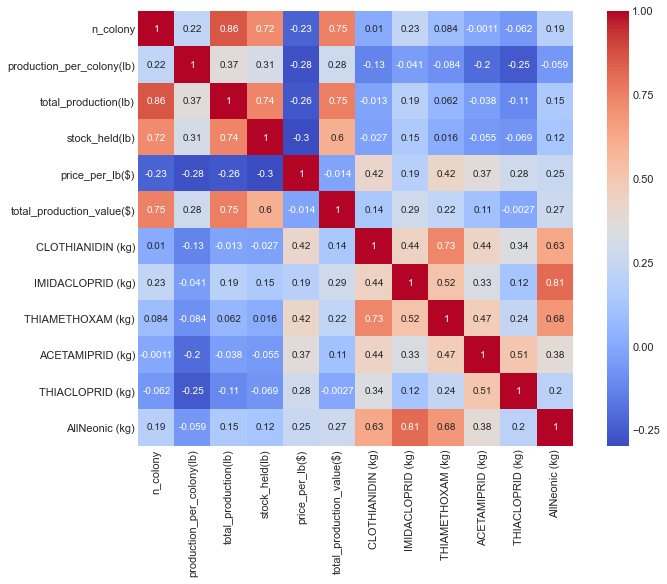

In [78]:
plt.figure(figsize=(12,8))
ax=sns.heatmap(corr2, annot=True, cmap='coolwarm',square=True,fmt='.2g',xticklabels='auto', yticklabels='auto')
ax.set_ylim([12,0])

#### 1. This correlation results employ longer period of data to confirm that honeybee colony number has strong correlation with  total production(0.86), stock_held(0.71); On the contrary, colony number has negative correction with honey price.
#### 2. All the five kinds of neonics exhibit different correlation trend with honeybee colony number; however, 'allneonic' has positive correlation with the colony number(corr=0.18), which indicates the application of neonic pesticide could promote  the honeybee developing. Among the neonics, IMIDACLOPRID(corr=0.22) plays a key role in promoting honeybee developing; it also show strongest correlation with allNeonic at 0.18. Thus, Imidacloprid is the most import neonics in promoting honey propagation. The second important one is THIAMETHOXAM(corr=0.073). The rest of neonics all affect the honeybee colony negatively.
### Let's pay attention to the five neonics correlation with honeybee colony number closer.

In [79]:
data5=neonic.loc[ : ,['n_colony','CLOTHIANIDIN (kg)','IMIDACLOPRID (kg)', 'THIAMETHOXAM (kg)','ACETAMIPRID (kg)',
                      'THIACLOPRID (kg)','AllNeonic (kg)']]
data5.head()

,n_colony,CLOTHIANIDIN (kg),IMIDACLOPRID (kg),THIAMETHOXAM (kg),ACETAMIPRID (kg),THIACLOPRID (kg),AllNeonic (kg)
year,,,,,,,
1995,16000.0,0.0,716.5,0.0,0.0,0.0,716.5
1996,15000.0,0.0,371.6,0.0,0.0,0.0,371.6
1997,14000.0,0.0,6704.8,0.0,0.0,0.0,6704.8
1998,16000.0,0.0,1836.3,0.0,0.0,0.0,1836.3
1999,17000.0,0.0,1251.2,0.0,0.0,0.0,1251.2


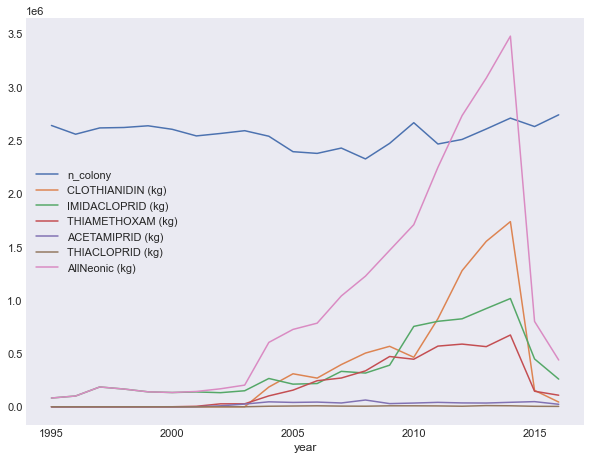

In [80]:
neonic_year=data5.groupby(['year']).sum().reset_index()
neonic_year.index=neonic_year['year']
neonic_year.plot(x='year', figsize=(10,7.5))
plt.show()

### Conclusion:
#### The volume of applied neonic pesticide starts from 0 in 1991; it keeps very low until 2003; it increases sharpely from 2003 to 2014; In 2015, it decreases to the level of 2006. Consequently, 2003 is a very import hinge. 
Since 2003, the curve for neonic usages starts increasing sharply. However, the colony numbers begin to decrease for several years and until 2006, colony numbers reach the bottom and start to increase to the peak (2010). In the following several years, it keeps small increasing trends. What’s astonished, the allneonic reaches peak at 2.87 million kg at 2014. Even though, it decreases after 2014, which still creates inestimable harm to the honeybee colonies in the long run. We will keep watching that.

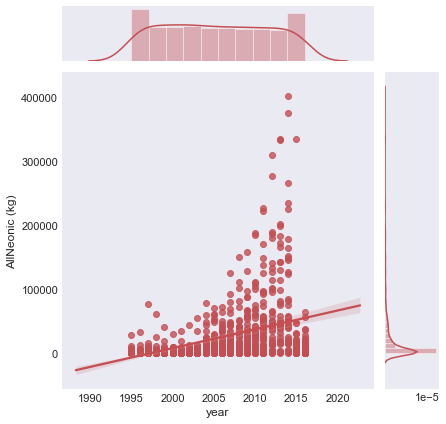

In [81]:
#Visualize Neonic usage from 1991 to 2016 in different states of the USA
sns.jointplot(data=neonic, x=neonic.index, y='AllNeonic (kg)', kind='reg', color='r')
plt.show()

In [82]:
print(neonic[neonic['state']=='California']['AllNeonic (kg)'])

year
1995     28576.6
1996     33002.7
1997     76719.6
1998     61047.2
1999     41778.9
2000     30796.5
2001     35178.6
2002     44682.6
2003     55419.8
2004     59321.1
2005     62021.8
2006     64488.1
2007    126006.2
2008    101975.6
2009     88386.0
2010    111344.4
2011    149528.3
2012    140689.4
2013    167111.2
2014    178152.7
2015    334951.8
2016         0.0
Name: AllNeonic (kg), dtype: float64


### Conclusion:
The volume of all neonic pesticides in most of states exhibits the same trend as that of the whole USA.
More than half of the states keep low neonic usage. In 1997, ‘California’ neonic usage already reaches 76719 kg, which ranks the top 1. Even though it decreases for several years, it still causes irreversible harm to the colonies. It double confirms that ‘2003’ is the hinge for neonic usage in USA.

In [83]:
df_pre_2003=neonic[neonic.index<2003]
df_2003=neonic[neonic.index>=2003]
df_2003.head()

,state_code,n_colony,production_per_colony(lb),total_production(lb),stock_held(lb),price_per_lb($),total_production_value($),state,Region,CLOTHIANIDIN (kg),IMIDACLOPRID (kg),THIAMETHOXAM (kg),ACETAMIPRID (kg),THIACLOPRID (kg),AllNeonic (kg)
year,,,,,,,,,,,,,,,
2003,AL,13000.0,82,1066000.0,43000.0,1.24,1322000.0,Alabama,South,0.0,668.3,591.7,0.0,0.0,1260.0
2004,AL,12000.0,87,1044000.0,282000.0,1.41,1472000.0,Alabama,South,2676.4,1323.9,3863.9,0.0,0.0,7864.2
2005,AL,13000.0,66,858000.0,266000.0,1.02,875000.0,Alabama,South,1503.6,994.5,5493.9,0.0,0.0,7992.0
2006,AL,11000.0,72,792000.0,230000.0,1.21,958000.0,Alabama,South,680.0,4230.2,5371.6,0.0,0.0,10281.8
2007,AL,11000.0,56,616000.0,209000.0,1.49,918000.0,Alabama,South,7696.2,3258.1,4149.6,0.0,0.0,15103.9


Text(0.5, 1.0, 'Neonic usage by state before 2003')

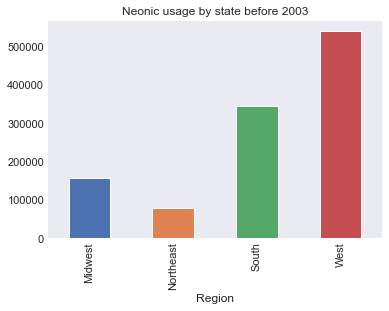

In [84]:
#neonic usage visualization by region
df_pre_2003.groupby(['Region'])['AllNeonic (kg)'].sum().plot(kind='bar')
plt.title('Neonic usage by state before 2003')

Text(0.5, 1.0, 'Neonic usage by state after 2003')

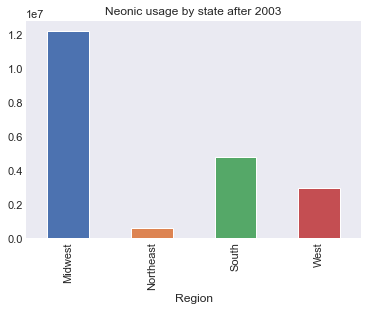

In [85]:
#neonic usage visualization by region
df_2003.groupby(['Region'])['AllNeonic (kg)'].sum().plot(kind='bar')
plt.title('Neonic usage by state after 2003')

        state  AllNeonic (kg)
0  California       1991179.1
1    Illinois       1978523.1
2        Iowa       1974038.9
3   Minnesota       1288217.3
4    Nebraska       1231300.7


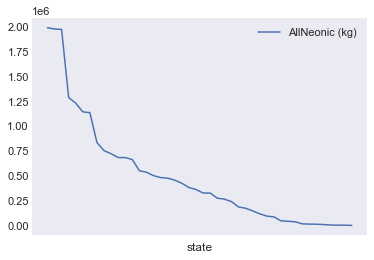

In [86]:
#Units of total neonic usage by state
data7=neonic.groupby(['state'])['AllNeonic (kg)'].sum().sort_values(ascending=False).reset_index()
print(data7.head())
data7.plot(x='state', y='AllNeonic (kg)')
plt.show()

### Conclusion:
1. When comparing the related data, the neonics usage of 'West' region decreases greatly after 2003. 
2. The neonics usage of 'Northwest' region are always ranking at the bottom. 
3. It is interesting that 'South' and 'West' regions decreases since 2003. The reason is maybe the detrimental effects of neonics were evident and caused the decreasing in colony numbers. California ranks the first in neonic pesticide usage.
#### Let's check the hypothesis by ploting colony size by region.

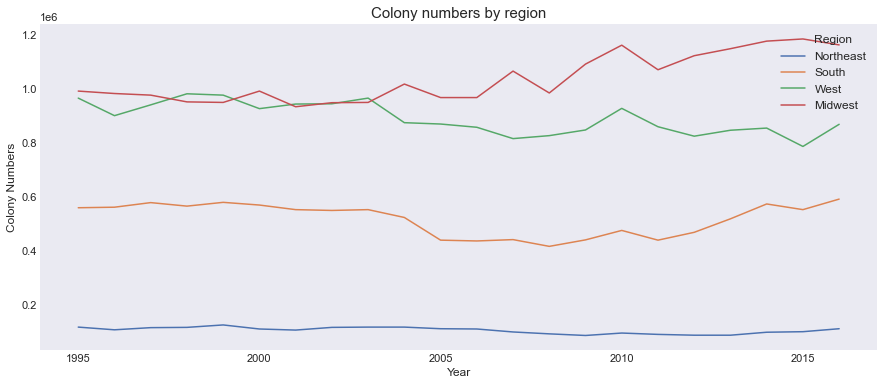

In [87]:
#Colony numbers visualization by region
colony_number=neonic.groupby(['Region','year'])['n_colony'].sum().sort_values().reset_index()
plt.figure(figsize=(15,6))
sns.lineplot(data=colony_number, x='year', y='n_colony',hue='Region')
plt.title('Colony numbers by region', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Colony Numbers')
plt.legend(fontsize=12, loc='upper right')
plt.show()

In [88]:
neonic['Year']=neonic.index
neonic.head()

,state_code,n_colony,production_per_colony(lb),total_production(lb),stock_held(lb),price_per_lb($),total_production_value($),state,Region,CLOTHIANIDIN (kg),IMIDACLOPRID (kg),THIAMETHOXAM (kg),ACETAMIPRID (kg),THIACLOPRID (kg),AllNeonic (kg),Year
year,,,,,,,,,,,,,,,,
1995,AL,16000.0,58,928000.0,28000.0,0.69,640000.0,Alabama,South,0.0,716.5,0.0,0.0,0.0,716.5,1995
1996,AL,15000.0,64,960000.0,96000.0,0.87,835000.0,Alabama,South,0.0,371.6,0.0,0.0,0.0,371.6,1996
1997,AL,14000.0,66,924000.0,92000.0,0.81,748000.0,Alabama,South,0.0,6704.8,0.0,0.0,0.0,6704.8,1997
1998,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,Alabama,South,0.0,1836.3,0.0,0.0,0.0,1836.3,1998
1999,AL,17000.0,68,1156000.0,185000.0,0.56,647000.0,Alabama,South,0.0,1251.2,0.0,0.0,0.0,1251.2,1999


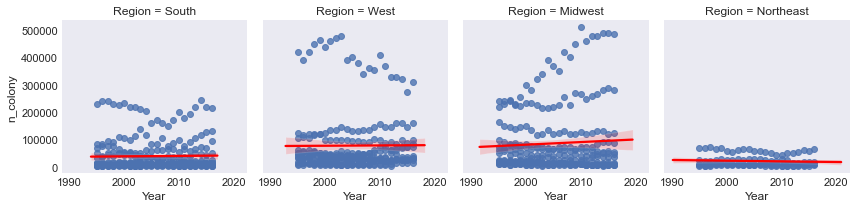

In [89]:
region_colony=sns.FacetGrid(neonic, col='Region')
region_colony.map(sns.regplot,'Year', 'n_colony', line_kws={'color':'red'})

In [90]:
#neonic usage visualization by region
neonic_usage=neonic.groupby(['Region','year']).sum().reset_index()

<Figure size 1440x1080 with 0 Axes>

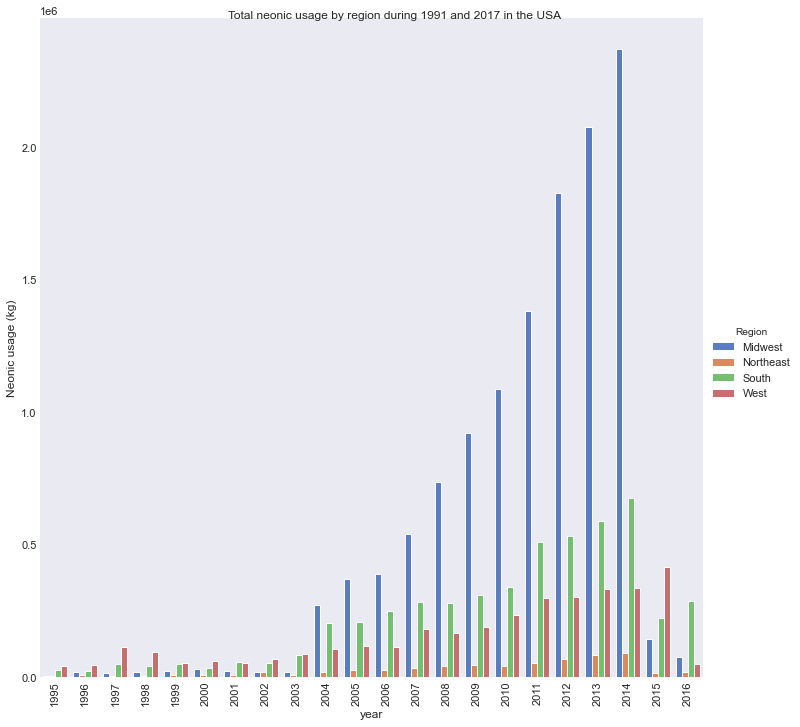

In [91]:
neonic_usage1=neonic_usage.loc[ : ,['year','Region','n_colony','CLOTHIANIDIN (kg)','IMIDACLOPRID (kg)', 'THIAMETHOXAM (kg)','ACETAMIPRID (kg)',
                      'THIACLOPRID (kg)','AllNeonic (kg)']]
plt.figure(figsize=(20,15))
g = sns.catplot(x="year", y='AllNeonic (kg)', hue="Region", data=neonic_usage1,
                height=10, kind="bar", palette="muted")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set_ylabels("Neonic usage (kg)")
g.fig.suptitle('Total neonic usage by region during 1991 and 2017 in the USA')
plt.show()

### Conclusion:
In the USA, more than 50% of the honeybee locate at MidWest and West area. Before 2003, the colonies of all these four regions keep small floatation. After 2003, the neonic usage produces different effect to these regions. 
•	The Northeast region uses the least neonics and keeps stable colony numbers.
•	 The South region reduces the neonic usage after 2003 and its colony numbers decreases since 2003 and increases after 2011.
•	The Midwest region benefits from the neonics the most and the colony numbers increase after 2003 since the neonics usage has a 100-fold increasing.
•	The West region suffers the neonics usage at a large amount before 2003; it increase usage by 6-fold, which doesn’t reverse the decreasing colony numbers trend.

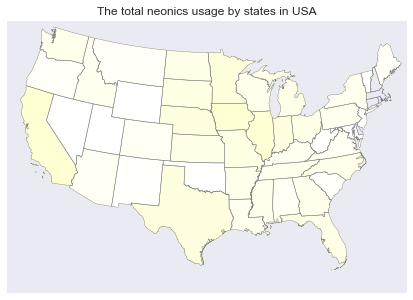

In [92]:
f, ax2=plt.subplots(1,1, figsize = (30,5))
states_neonics_dict = dict(zip(data7['state'], data7['AllNeonic (kg)']))

m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95, ax=ax2)

shp_info = m.readshapefile('usa-map-shape/st99_d00','states',drawbounds=True, linewidth=0.45,color='gray')

colors={}
statenames=[]
cmap = plt.cm.hot_r 
vmin = 0; vmax = 1000000000
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico','Alaska',
                         'New Hampshire','Massachusetts','Connecticut',
                        'Rhode Island','Delaware']:
        pop = states_neonics_dict[statename]
        colors[statename] = cmap(np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
for nshape,seg in enumerate(m.states):
    if statenames[nshape] not in ['District of Columbia','Puerto Rico','Alaska',
                         'New Hampshire','Massachusetts','Connecticut',
                        'Rhode Island','Delaware']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax2.add_patch(poly)
plt.title('The total neonics usage by states in USA')        
plt.show()    

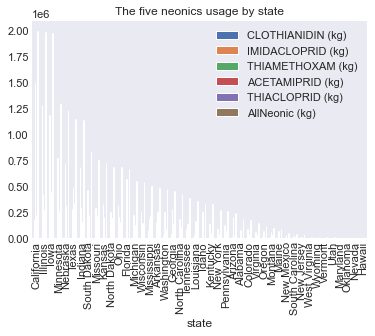

In [93]:
data8=neonic.loc[ : ,['state','CLOTHIANIDIN (kg)','IMIDACLOPRID (kg)', 'THIAMETHOXAM (kg)','ACETAMIPRID (kg)',
                      'THIACLOPRID (kg)','AllNeonic (kg)']]
data8_state=data8.groupby(['state']).sum().sort_values(by='AllNeonic (kg)', ascending=False).reset_index()
data8_state.index=data8_state.state
data8_state.plot(x='state', kind='bar')
plt.title('The five neonics usage by state')
plt.show()

In [94]:
#Add new column determined by pre- and post-neonics (2003)
neonic['post-neonics(2003)'] = np.where(neonic.index>=2003, 1, 0)
neonic['year']=neonic.index
neonic.head()

,state_code,n_colony,production_per_colony(lb),total_production(lb),stock_held(lb),price_per_lb($),total_production_value($),state,Region,CLOTHIANIDIN (kg),IMIDACLOPRID (kg),THIAMETHOXAM (kg),ACETAMIPRID (kg),THIACLOPRID (kg),AllNeonic (kg),Year,post-neonics(2003),year
year,,,,,,,,,,,,,,,,,,
1995,AL,16000.0,58,928000.0,28000.0,0.69,640000.0,Alabama,South,0.0,716.5,0.0,0.0,0.0,716.5,1995,0,1995
1996,AL,15000.0,64,960000.0,96000.0,0.87,835000.0,Alabama,South,0.0,371.6,0.0,0.0,0.0,371.6,1996,0,1996
1997,AL,14000.0,66,924000.0,92000.0,0.81,748000.0,Alabama,South,0.0,6704.8,0.0,0.0,0.0,6704.8,1997,0,1997
1998,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,Alabama,South,0.0,1836.3,0.0,0.0,0.0,1836.3,1998,0,1998
1999,AL,17000.0,68,1156000.0,185000.0,0.56,647000.0,Alabama,South,0.0,1251.2,0.0,0.0,0.0,1251.2,1999,0,1999


/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



Text(0.5, 1.0, 'California')

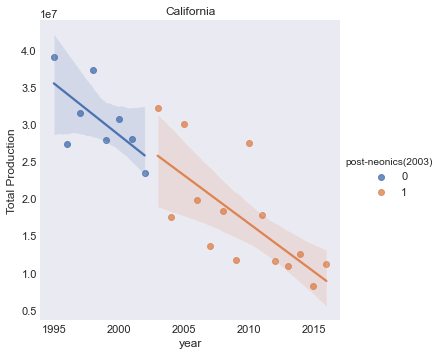

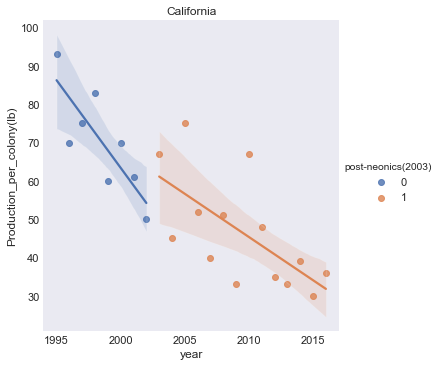

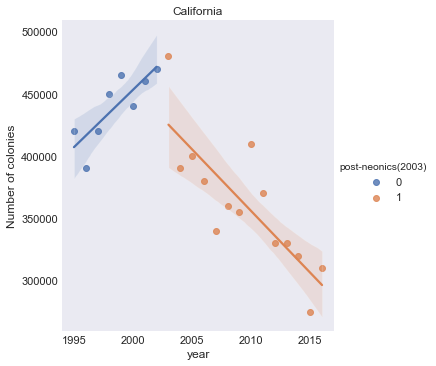

In [95]:
g = sns.lmplot(x='year', y="total_production(lb)", hue="post-neonics(2003)",
               truncate=True, size=5, data=neonic[neonic.state =='California'])
g.set_ylabels("Total Production")
plt.title('California')

g = sns.lmplot(x="year", y="production_per_colony(lb)", hue="post-neonics(2003)",
               truncate=True, size=5, data=neonic[neonic.state =='California'])
g.set_ylabels("Production_per_colony(lb)")
plt.title('California')

g = sns.lmplot(x="year", y="n_colony", hue="post-neonics(2003)",
               truncate=True, size=5, data=neonic[neonic.state =='California'])
g.set_ylabels("Number of colonies")
plt.title('California')

### Conclusion:
California's no. of colonies, yield per colony and total production have been decreasing consistently since their frequent heavy use of neonics in 1994

Text(0.5, 1.0, 'Illinois')

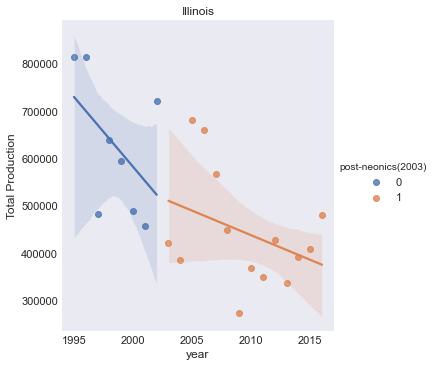

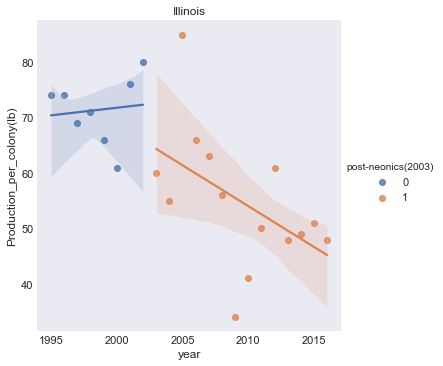

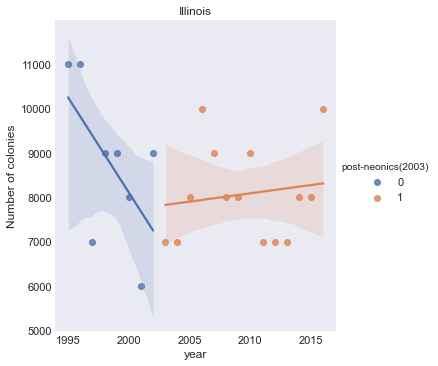

In [96]:
g = sns.lmplot(x='year', y="total_production(lb)", hue="post-neonics(2003)",
               truncate=True, height=5, data=neonic[neonic.state =='Illinois'])
g.set_ylabels("Total Production")
plt.title('Illinois')

g = sns.lmplot(x="year", y="production_per_colony(lb)", hue="post-neonics(2003)",
               truncate=True, height=5, data=neonic[neonic.state =='Illinois'])
g.set_ylabels("Production_per_colony(lb)")
plt.title('Illinois')

g = sns.lmplot(x="year", y="n_colony", hue="post-neonics(2003)",
               truncate=True, height=5, data=neonic[neonic.state =='Illinois'])
g.set_ylabels("Number of colonies")
plt.title('Illinois')

### Conclusion:
By applying neonic, Illinois's production per colony id sligtly decreasing after 2003 even though the colony number is increasing slowly.

Text(0.5, 1.0, 'Iowa')

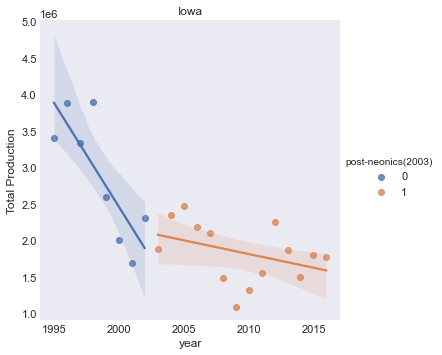

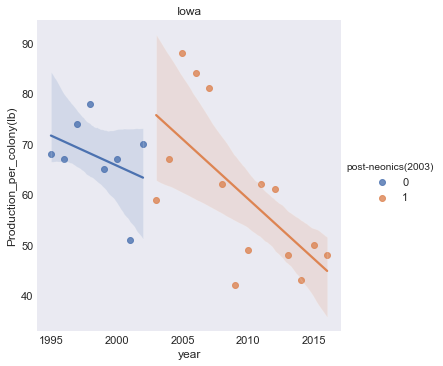

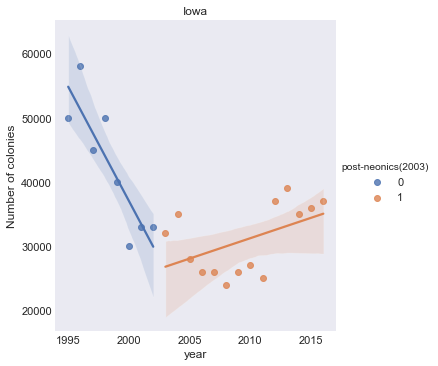

In [97]:
g = sns.lmplot(x='year', y="total_production(lb)", hue="post-neonics(2003)",
               truncate=True, height=5, data=neonic[neonic.state =='Iowa'])
g.set_ylabels("Total Production")
plt.title('Iowa')

g = sns.lmplot(x="year", y="production_per_colony(lb)", hue="post-neonics(2003)",
               truncate=True, height=5, data=neonic[neonic.state =='Iowa'])
g.set_ylabels("Production_per_colony(lb)")
plt.title('Iowa')

g = sns.lmplot(x="year", y="n_colony", hue="post-neonics(2003)",
               truncate=True, height=5, data=neonic[neonic.state =='Iowa'])
g.set_ylabels("Number of colonies")
plt.title('Iowa')

### Conclusion:
Similar to Illinois, Iowa's total production and number of colonies were decreasing before 2003., with yield per colony increasing. Their number of colonies, however, were rapidly decreasing. In both these cases, it would seem that the introduction of neonics was beneficial in slowing colony collapse and colony numbers are now on the rise.

### Summary:
1. Only 'Midwest' area exhibits increasing trend of honeybee colony even though large amount of neonic usage after 2003.
2. Number of honeybee colony in 'Northeast' area is reiesatively stable and also this area only uses small amount of neonic pesticide.
3. 'South' region exhibits a slight decrease in number of honeybee colony after 2003 which coincides with a decrease in neonic usage, although colony numbers appear to be on the rise or maintaining a consistent number in the future. 
4. 'West' region shows a decrease in the number of colonies and Californian should be responsible for the colony number decreasing due to its massive neonic usage before 2003.

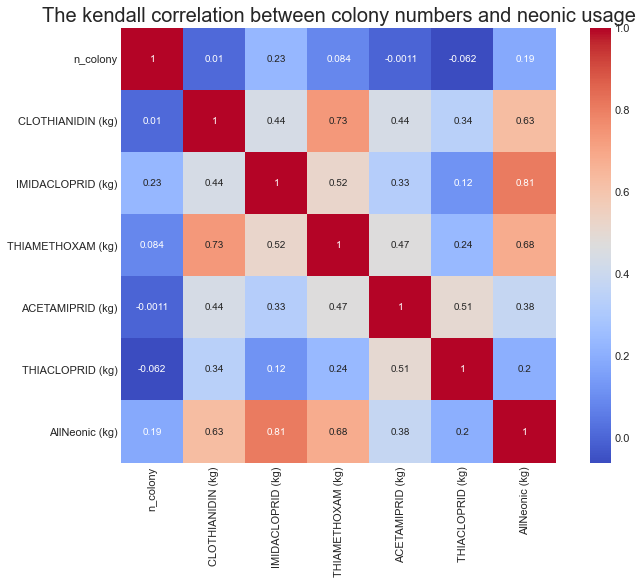

In [98]:
corr3=data5.corr(method='kendall')
plt.figure(figsize=(12,8))
ax=sns.heatmap(corr3, annot=True, cmap='coolwarm',square=True,fmt='.2g',xticklabels='auto', yticklabels='auto')
ax.set_ylim([7,0])
plt.title('The kendall correlation between colony numbers and neonic usage', fontsize=20)
plt.show()

### Machine learning analysis of neonics usage
1. Linear Regression Model
2. Logistic Regression Model
3. XGBoost Model
4. Decision Tree Model
5. PCA analysis

In [99]:
#Let' s start machine learning method by building the training and test datasets.
X=data5.iloc[:,[1,2,3,4,5,6]]
y=data5['n_colony']
#getting test and training set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=353)
print(X_train.head())
print(y_train.head())

      CLOTHIANIDIN (kg)  IMIDACLOPRID (kg)  THIAMETHOXAM (kg)  \
year                                                            
2001                0.0             4000.5              104.6   
2000                0.0             2204.3                0.0   
2004             1861.5             1657.0             1847.5   
1998                0.0             1724.5                0.0   
2002                0.0             2572.4              369.5   

      ACETAMIPRID (kg)  THIACLOPRID (kg)  AllNeonic (kg)  
year                                                      
2001               0.0               0.0          4105.1  
2000               0.0               0.0          2204.3  
2004               0.0               0.0          5366.0  
1998               0.0               0.0          1724.5  
2002              79.5               0.0          3021.4  
year
2001    135000.0
2000     50000.0
2004     23000.0
1998     27000.0
2002      8000.0
Name: n_colony, dtype: float64


### 1. Linear Regression Model

In [100]:
reg=LinearRegression()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.302636478987379

#### R^2 score between y_test and y_predict is 0.3026 based on linear regression model.

### Let' s check the three neonic features one by one by linear regression model

In [101]:
#Allneonic usage linear regression model
X6=data5.iloc[:,[6]]
y=data5['n_colony']
#getting test and training set
X6_train,X6_test,y_train,y_test=train_test_split(X6,y,test_size=0.2, random_state=353)
reg=LinearRegression()
reg.fit(X6_train, y_train)
y_pred=reg.predict(X6_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.0554262885347645

#### R^2 score between Allneonic and colony number is 0.05542 based on linear regression model.

In [102]:
X2=data5.iloc[:,[2]]
y=data5['n_colony']
#getting test and training set
X2_train,X2_test,y_train,y_test=train_test_split(X2,y,test_size=0.2, random_state=353)
reg=LinearRegression()
reg.fit(X2_train, y_train)
y_pred=reg.predict(X2_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.2605043689575788

#### R^2 score between IMIDACLOPRID and colony number is 0.2605 based on linear regression model.

In [103]:
#CLOTHIANIDIN usage linear regression model
X1=data5.iloc[:,[1]]
y=data5['n_colony']
#getting test and training set
X1_train,X1_test,y_train,y_test=train_test_split(X1,y,test_size=0.2, random_state=353)
reg=LinearRegression()
reg.fit(X1_train, y_train)
y_pred=reg.predict(X1_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.004252047871381892

In [104]:
#THIAMETHOXAM usage linear regression model
X3=data5.iloc[:,[3]]
y=data5['n_colony']
#getting test and training set
X3_train,X3_test,y_train,y_test=train_test_split(X3,y,test_size=0.2, random_state=353)
reg=LinearRegression()
reg.fit(X3_train, y_train)
y_pred=reg.predict(X3_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.010341371620170792

In [105]:
#ACETAMIPRID usage linear regression model
X4=data5.iloc[:,[4]]
y=data5['n_colony']
#getting test and training set
X4_train,X4_test,y_train,y_test=train_test_split(X4,y,test_size=0.2, random_state=353)
reg=LinearRegression()
reg.fit(X4_train, y_train)
y_pred=reg.predict(X4_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.08938921604503114

In [106]:
# THIACLOPRID usage linear regression model
X5=data5.iloc[:,[5]]
y=data5['n_colony']
#getting test and training set
X5_train,X5_test,y_train,y_test=train_test_split(X5,y,test_size=0.2, random_state=353)
reg=LinearRegression()
reg.fit(X5_train, y_train)
y_pred=reg.predict(X5_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.005188099324455742

### Summary:

1. R2 score between Allneonic and colony number is 0.05542.
2. R2 score between IMIDACLOPRID and colony number is 0.2605, which is the most beneficial neonics. It indicates in a defined range(0.2~1*106 kg), the more IMIDACLOPRID usage, the more colony numbers.
3. R2 score between CLOTHIANIDIN and colony number is -0.004, which indicates there' s almost no correlation between them. Thus, CLOTHIANIDIN usage can be decreased during honeybee growing process.
4. R2 score between ACETAMIPRID and colony number is 0.0893; the kendall corr is -0.03; so we should decrease the usage amount of this neonic pesticide.
5. R2 score between THIACLOPRID and colony number is -0.005; the kendall correlation is -0.072; Thus, we should stop using this neonic to avoid the negative influences on colonies.

#### 2. Logistic Regression Model

In [107]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.02


In [109]:
#Confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      3000.0       0.00      0.00      0.00         1
      4000.0       0.00      0.00      0.00         4
      5000.0       0.00      0.00      0.00        10
      6000.0       0.00      0.00      0.00         5
      7000.0       0.14      0.21      0.17        14
      8000.0       0.00      0.00      0.00         7
      9000.0       0.00      0.00      0.00        10
     10000.0       0.00      0.00      0.00         6
     11000.0       0.00      0.00      0.00         1
     12000.0       0.00      0.00      0.00         5
     13000.0       0.00      0.00      0.00         3
     14000.0       0.00      0.00      0.00         1
     15000.0       0.00      0.00      0.00         5
     16000.0       0.00      0.00      0.00         6
     17000.0       0.00      0.00      0.00         1
     18000.0       0.00      0.00      0.00         4
     19000.0       0.00      0.00      0.00         1
     22000.0       0.00    

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



### The logistic regression accuracy between y_test and y_predict is 1%, which is very low.
### 3. XGboost model

In [111]:
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)
y_pred= gbm.predict(X_test)
r2_score(y_test, y_pred)

-0.027603243942196487

#### The R^2 score between y_test and y_predict is -0.072 based on XGBoost model.

### 4. Decision Tree Model

In [112]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.1, random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=0.0001)
DTree.fit(X_train, y_train)
y_predict=DTree.predict(X_test)
from sklearn.metrics import r2_score 
r2_score(y_test, y_predict)

0.39495505655088015

#### The R^2 score between y_test and y_predict is 0.4901 based on decision tree model.

### 5. PCA analysis

In [113]:
kmeans4=KMeans(n_clusters=4, random_state=1)
matrix=neonic.pivot_table(index='year', \
                        columns=['n_colony'], \
                        values=['AllNeonic (kg)'])
matrix=matrix.fillna(0)
matrix.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/pivot.py:86: FutureWarning:

'year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



AllNeonic (kg)                                               \
n_colony       2000.0   3000.0   4000.0   5000.0   6000.0   7000.0     
year                                                                   
1995                0.0     78.8    156.3    203.7     0.00   361.90   
1996                0.0     34.5    272.6    320.9     0.00   810.15   
1997                0.0   1370.3   1065.1     68.3   475.10   717.80   
1998                0.0   3317.9    119.4      0.0    61.95  1714.60   
1999                0.0   4566.6      0.0      0.0   182.90   835.50   

                                                       ...              \
n_colony     8000.0       9000.0   10000.0  11000.0    ...    420000.0   
year                                                   ...               
1995       189.200000   677.050000    44.40  1071.15   ...     28576.6   
1996         0.000000  1356.666667   515.40    69.80   ...         0.0   
1997      2495.640000     0.000000   179.60     0.00   ...     76719.6   
1998      3139.533333   147.000000  1594.85   328.80   ...         0.0   
1999      1598.100000  1276.400000   519.75     0.00   ...         0.0   

                                                                         \
n_colony 440000.0 450000.0 460000.0 465000.0 470000.0 480000.0 485000.0   
year                                                                      
1995          0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1996          0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1997          0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1998          0.0  61047.2      0.0      0.0      0.0      0.0      0.0   
1999          0.0      0.0      0.0  41778.9      0.0      0.0      0.0   

                            
n_colony 490000.0 510000.0  
year                        
1995          0.0      0.0  
1996          0.0      0.0  
1997          0.0      0.0  
1998          0.0      0.0  
1999          0.0      0.0  

[5 rows x 171 columns]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



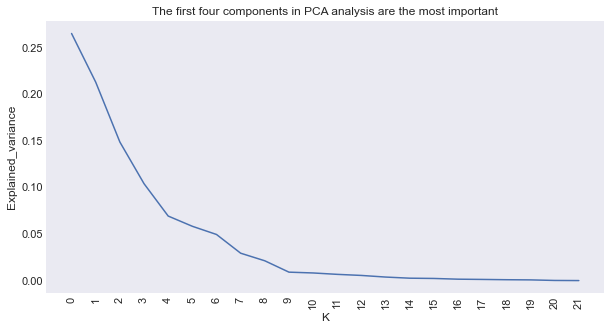

In [114]:
x_cols=matrix.as_matrix()
#scale data
scaler = StandardScaler()
features = scaler.fit_transform(matrix)
#fit PCA
pca = PCA()
components = pca.fit_transform(features)
a=pca.fit(matrix).explained_variance_ratio_
fig, ax=plt.subplots(figsize=(10,5))
pd.Series(a).plot()
plt.xlabel('K')
plt.ylabel('Explained_variance')
plt.xticks(rotation=90)
ax.set_xticks(np.arange(0,22,1))
plt.title('The first four components in PCA analysis are the most important')
plt.show()

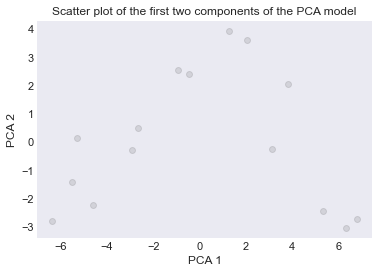

In [115]:
#cluster analysis
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Scatter plot of the first two components of the PCA model')
plt.show()

#### Based on PCA analysis, the first three components among all states are very important. Between the first two components, there' s no clear clusters between them.

### Summary:
1. neonics usage has positive correlation with honeybee colony numbers (corr=0.18) and the colony number also has postive correlation with honey production (corr=0.86), total production value(corr=0.77), stock held(corr=0.74), consumption (corr=0.79). Thus, the decreasing colony-number trend will lead to all the features listed here decreasing. Properly neonics usage can  promote healthy honeybee colony developing.
2. Based on linear regression analysis, we obtained several equations for predicting the related features:
a. Linear regression model equation between colony number and total production is Y=75.176269*x+(-217527.838246)
b. Linear regression model equation between total production value and total production is Y=0.899496*x+321513.360978
c. Linear regression model equation between stock helad and total production is Y=2.893702*x+(695483.505816)
d. Linear regression model equation between price and total production is Y=-3864985.077840*x+(10028476.493532)
e. Linear regression model equation between consumption and total production is Y=1.348415*x+(211645.595899)
3. The honey price has negative correlation with total production and with less and less prodcution, the price can be predicted to keep going up in the near future. 
4. Among the four regions, only MidWest region exhibit a very clear zigzag increasing-colony-number trend and also the neonics usage of Midwest region after 2003 is the most. In the short period, the neonics help the colony growing. However, we can't make conclusions that the other region also needs to increase the neonics usage to increase the production. 'California' can be a good example. Before 2003, it used too much neonics and in the following 15 years, its colony number keeps decreasing.

### End